<a href="https://colab.research.google.com/github/ShruthiMeenakshi/Computer_Vision_Model/blob/main/discipline_yolov11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !nvidia-smi

Tue Apr 22 16:21:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.113 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Fqm1AB4DpqCj2T1uvC9O")
project = rf.workspace("disciplinary-monitoring-system-using-yolov11").project("disciplinary-monitoring")
version = project.version(3)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Disciplinary-Monitoring-3 in yolov11:: 100%|██████████| 6060/6060 [00:00<00:00, 7815.15it/s]


In [ ]:
dataset.location

'/content/datasets/Disciplinary-Monitoring-3'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=25 imgsz=640 plots=True

100% 5.35M/5.35M [00:00<00:00, 238MB/s]
Ultralytics 8.3.58 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Disciplinary-Monitoring-3/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sav

In [ ]:
!yolo task=segment mode=train data={dataset.location}/data.yaml model="yolo11n-seg.pt" epochs=70 imgsz=640 plots=True

100% 5.90M/5.90M [00:00<00:00, 90.1MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/datasets/Disciplinary-Monitoring-3/data.yaml, epochs=70, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

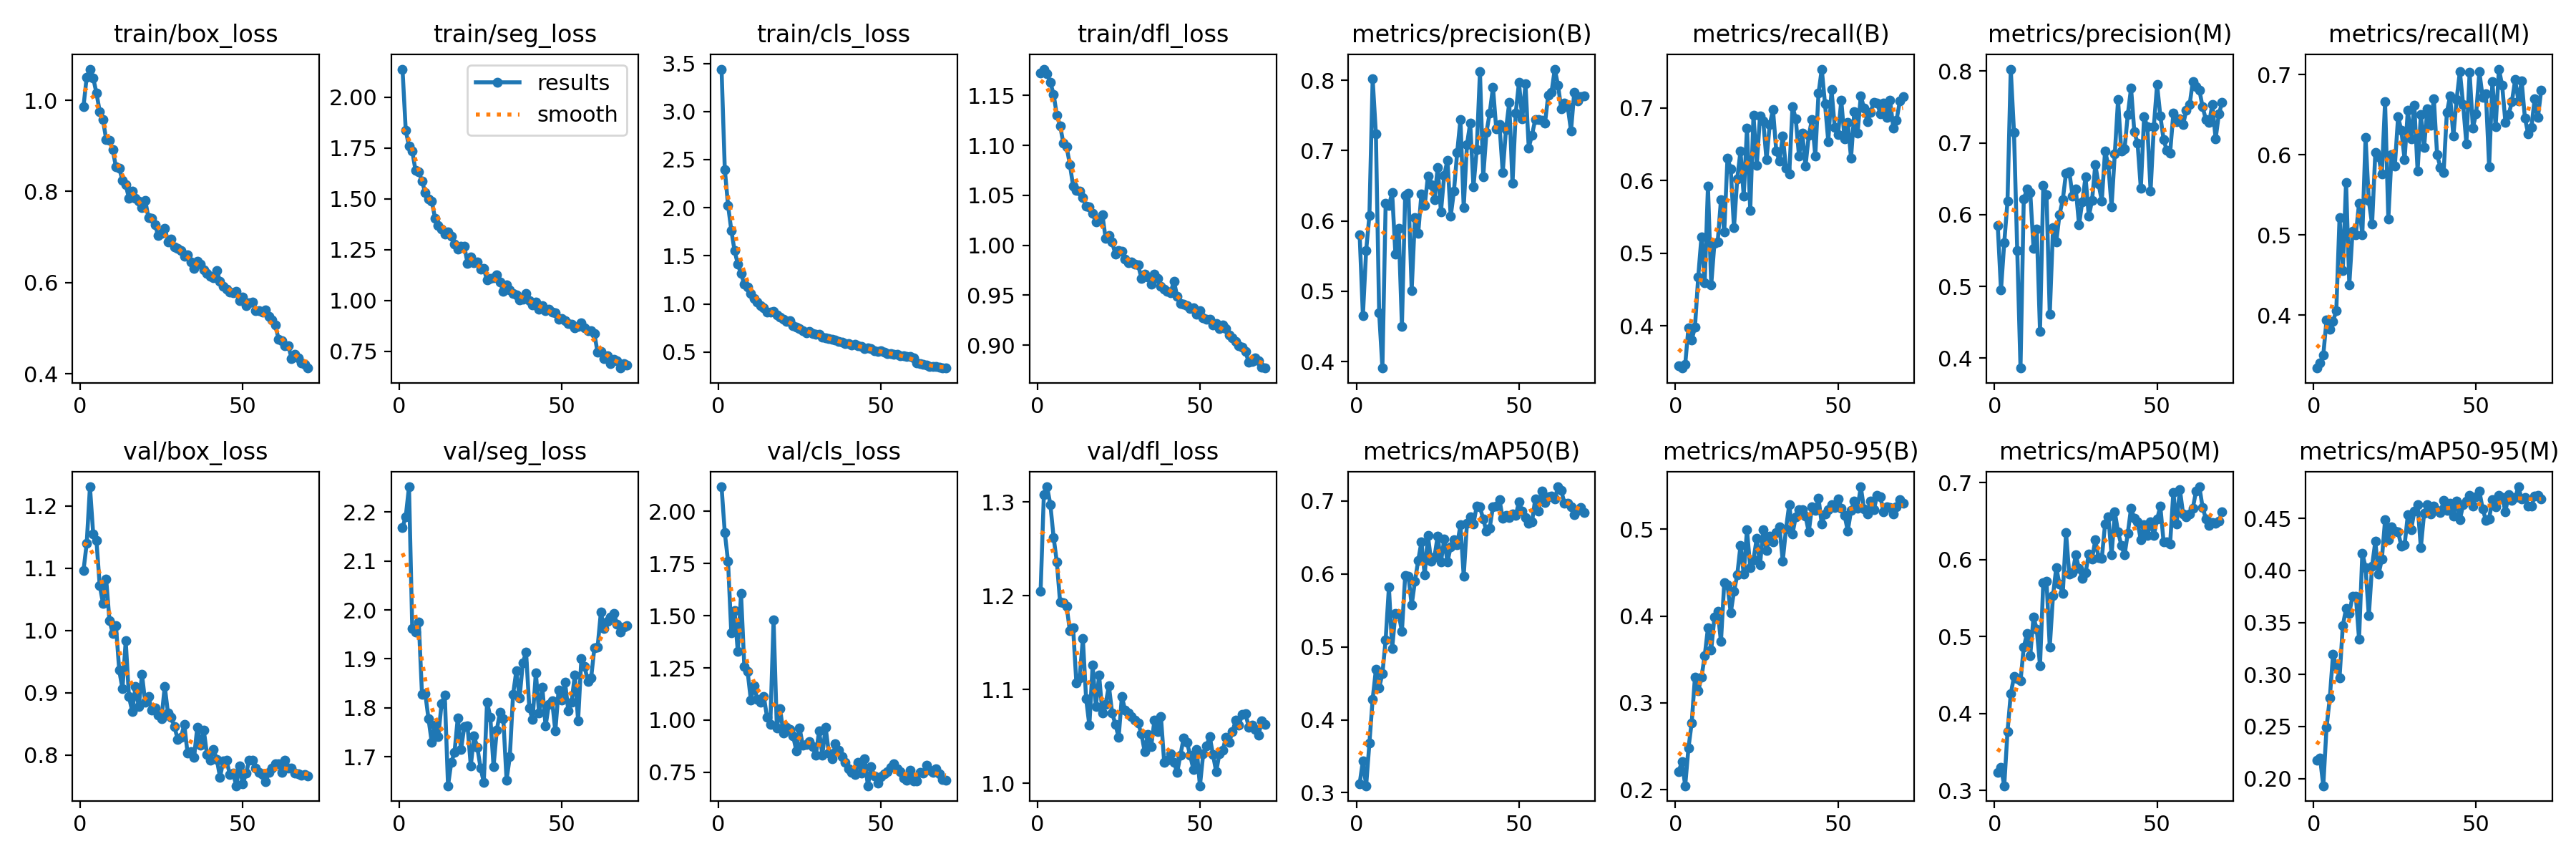

In [ ]:
from IPython.display import Image
Image(filename='/content/datasets/runs/segment/train/results.png', width=600)

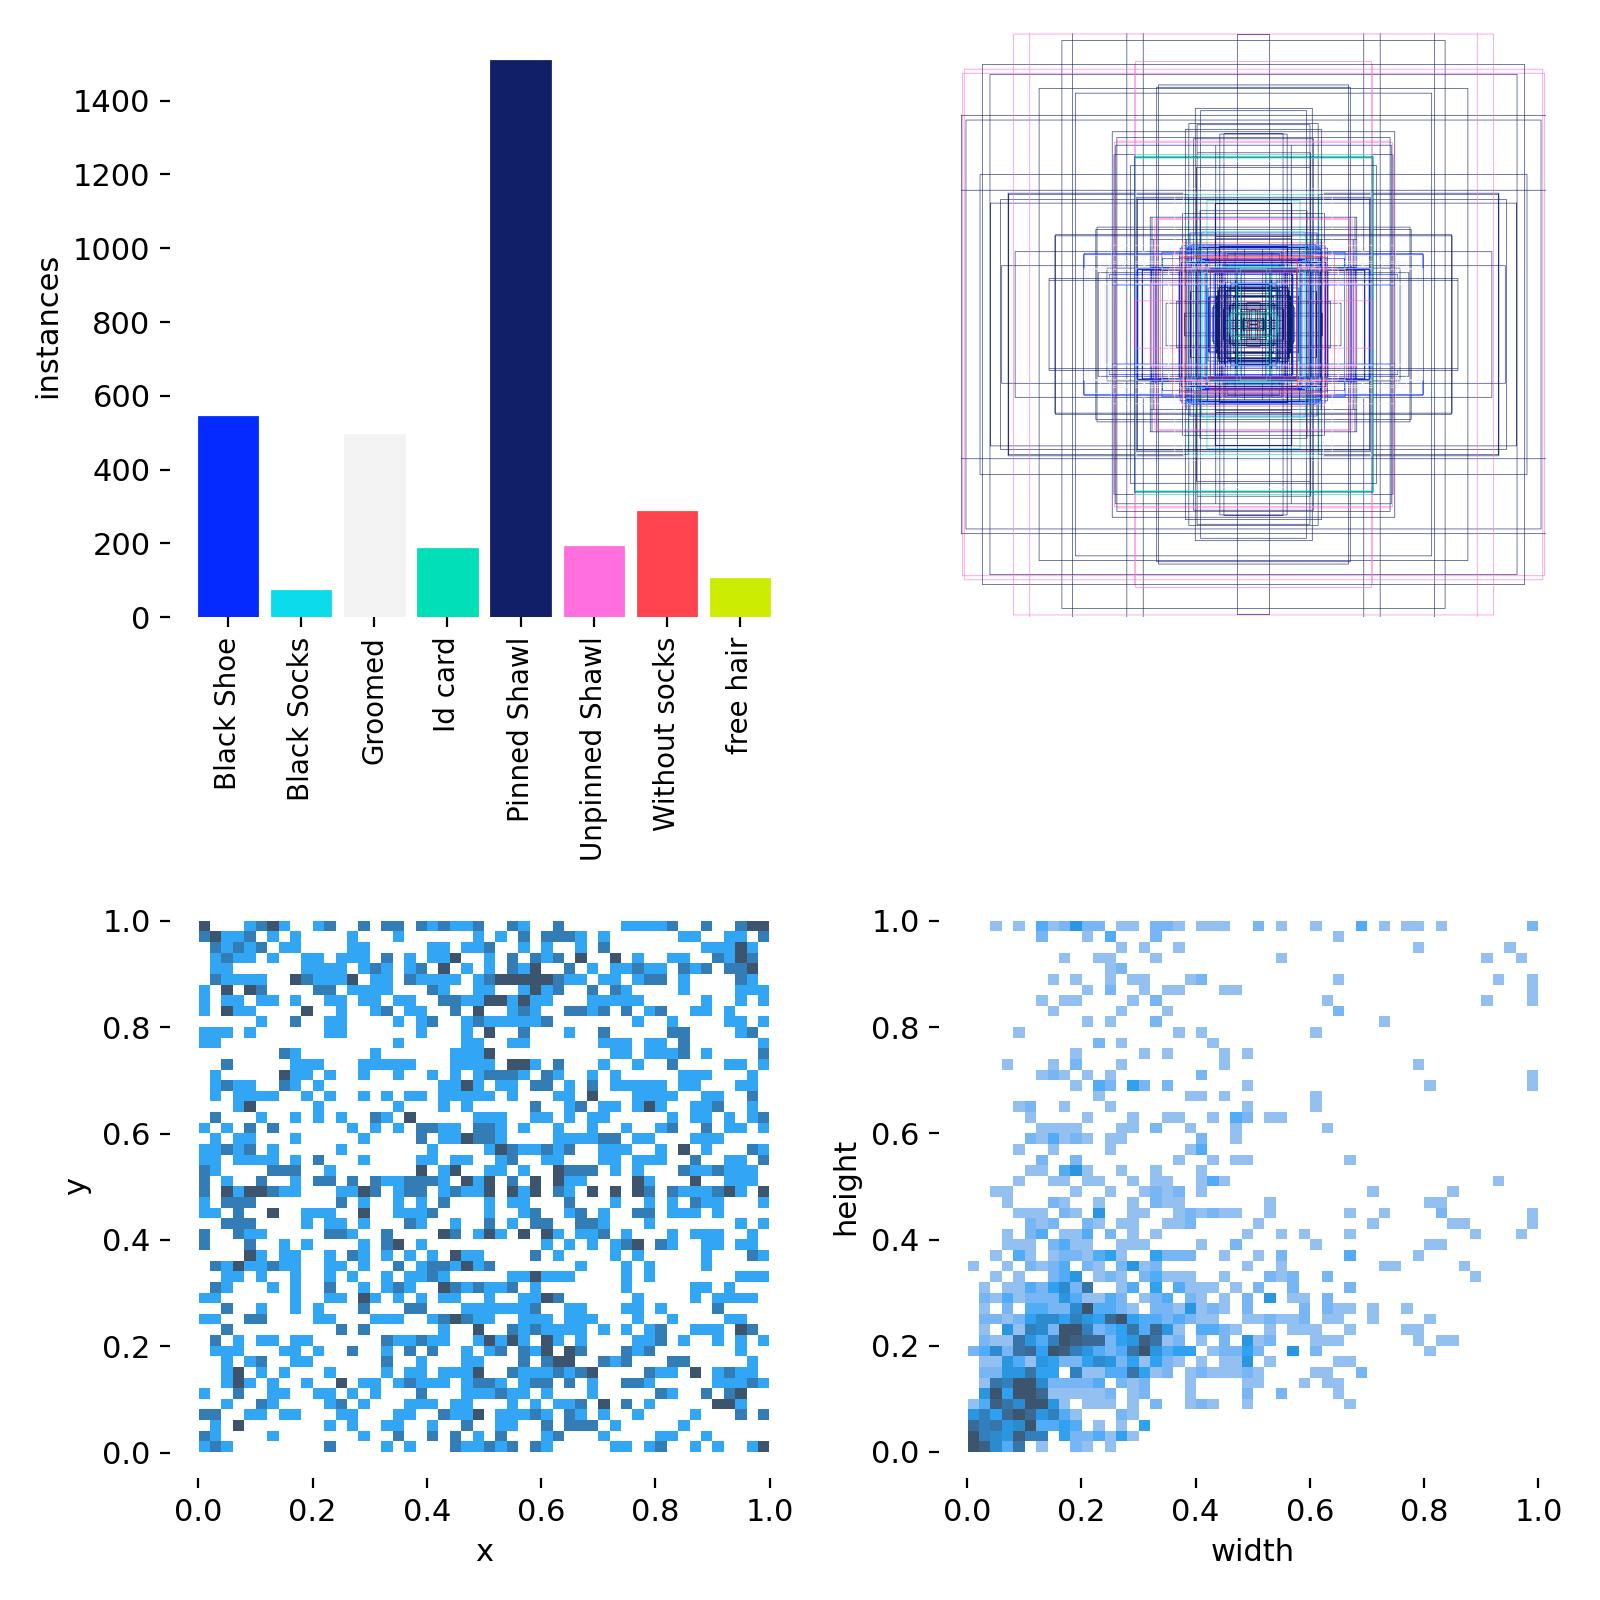

In [ ]:
Image("/content/datasets/runs/segment/train/labels.jpg", width=600)

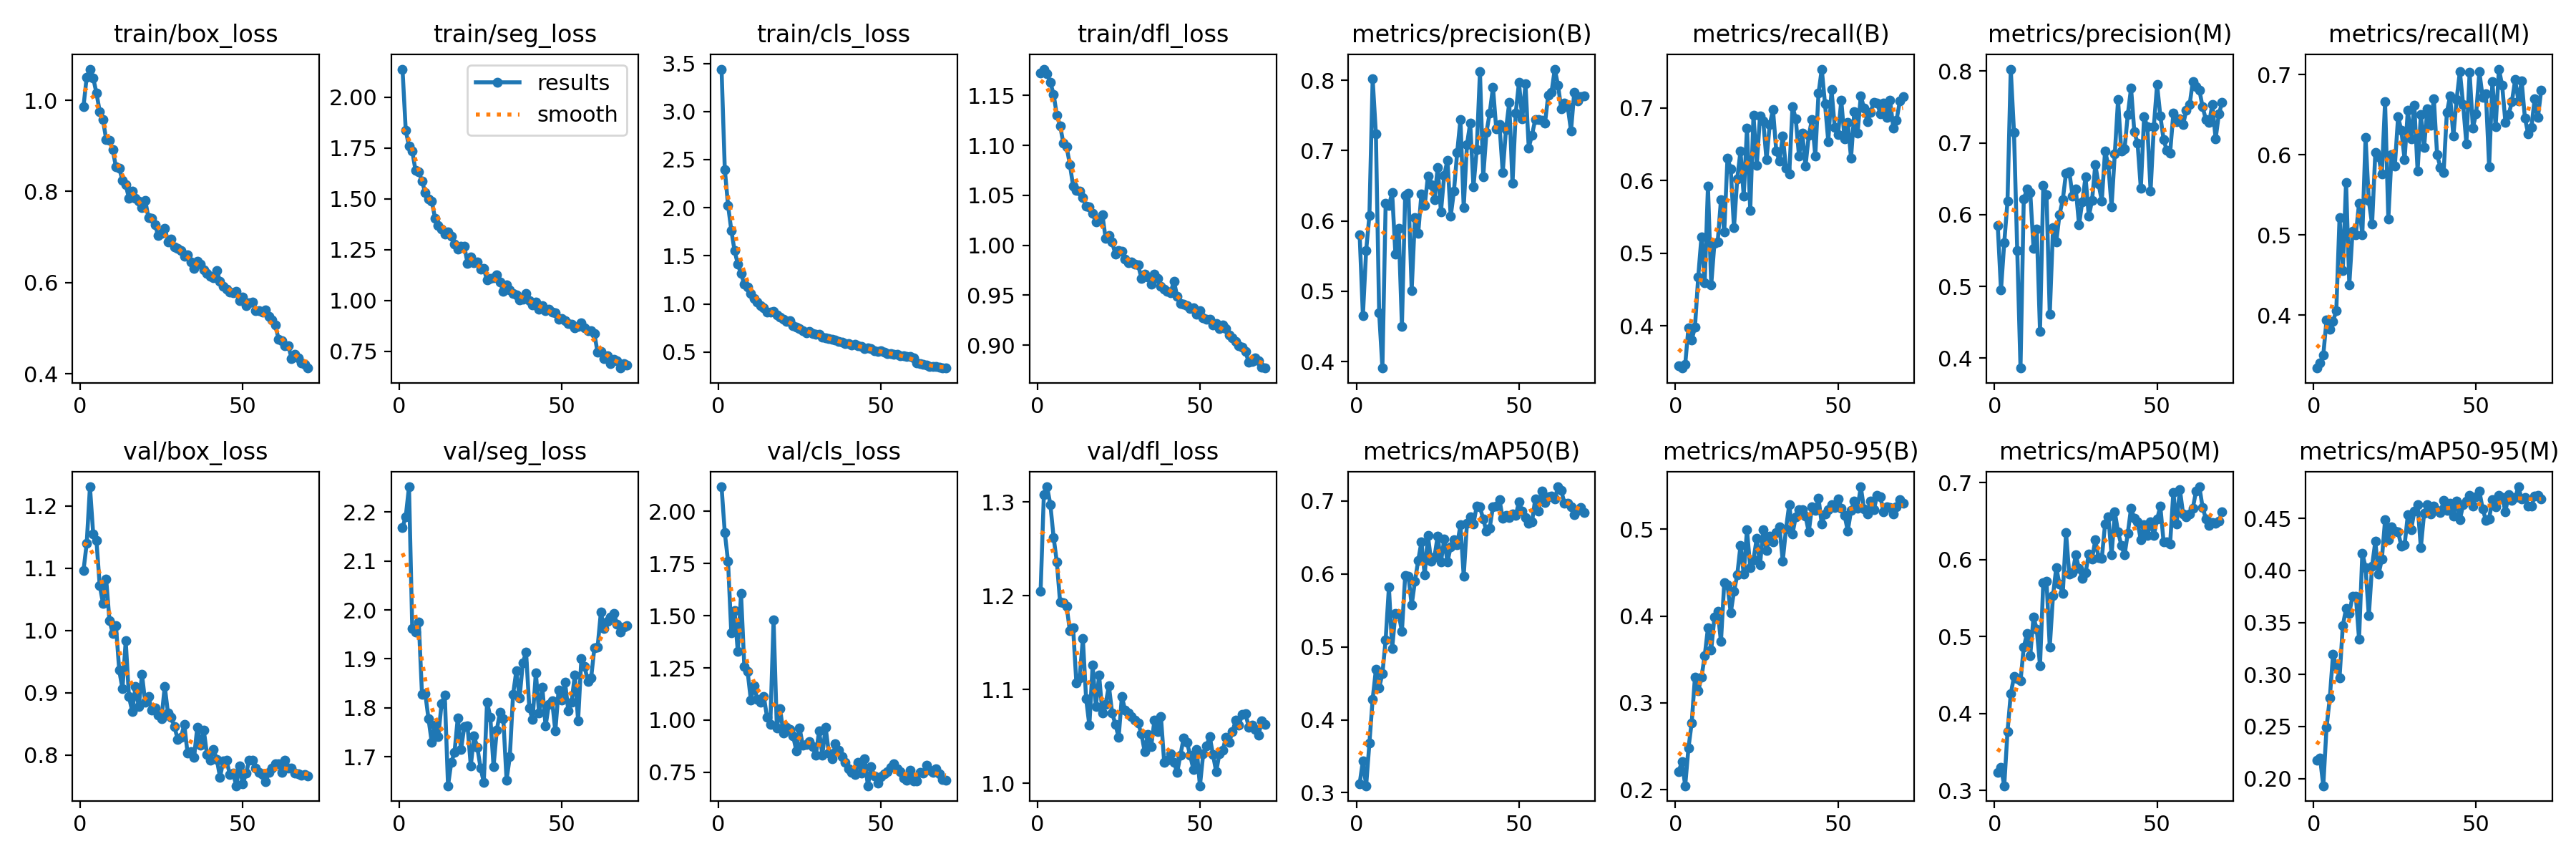

In [ ]:
Image("/content/datasets/runs/segment/train/results.png", width=600)

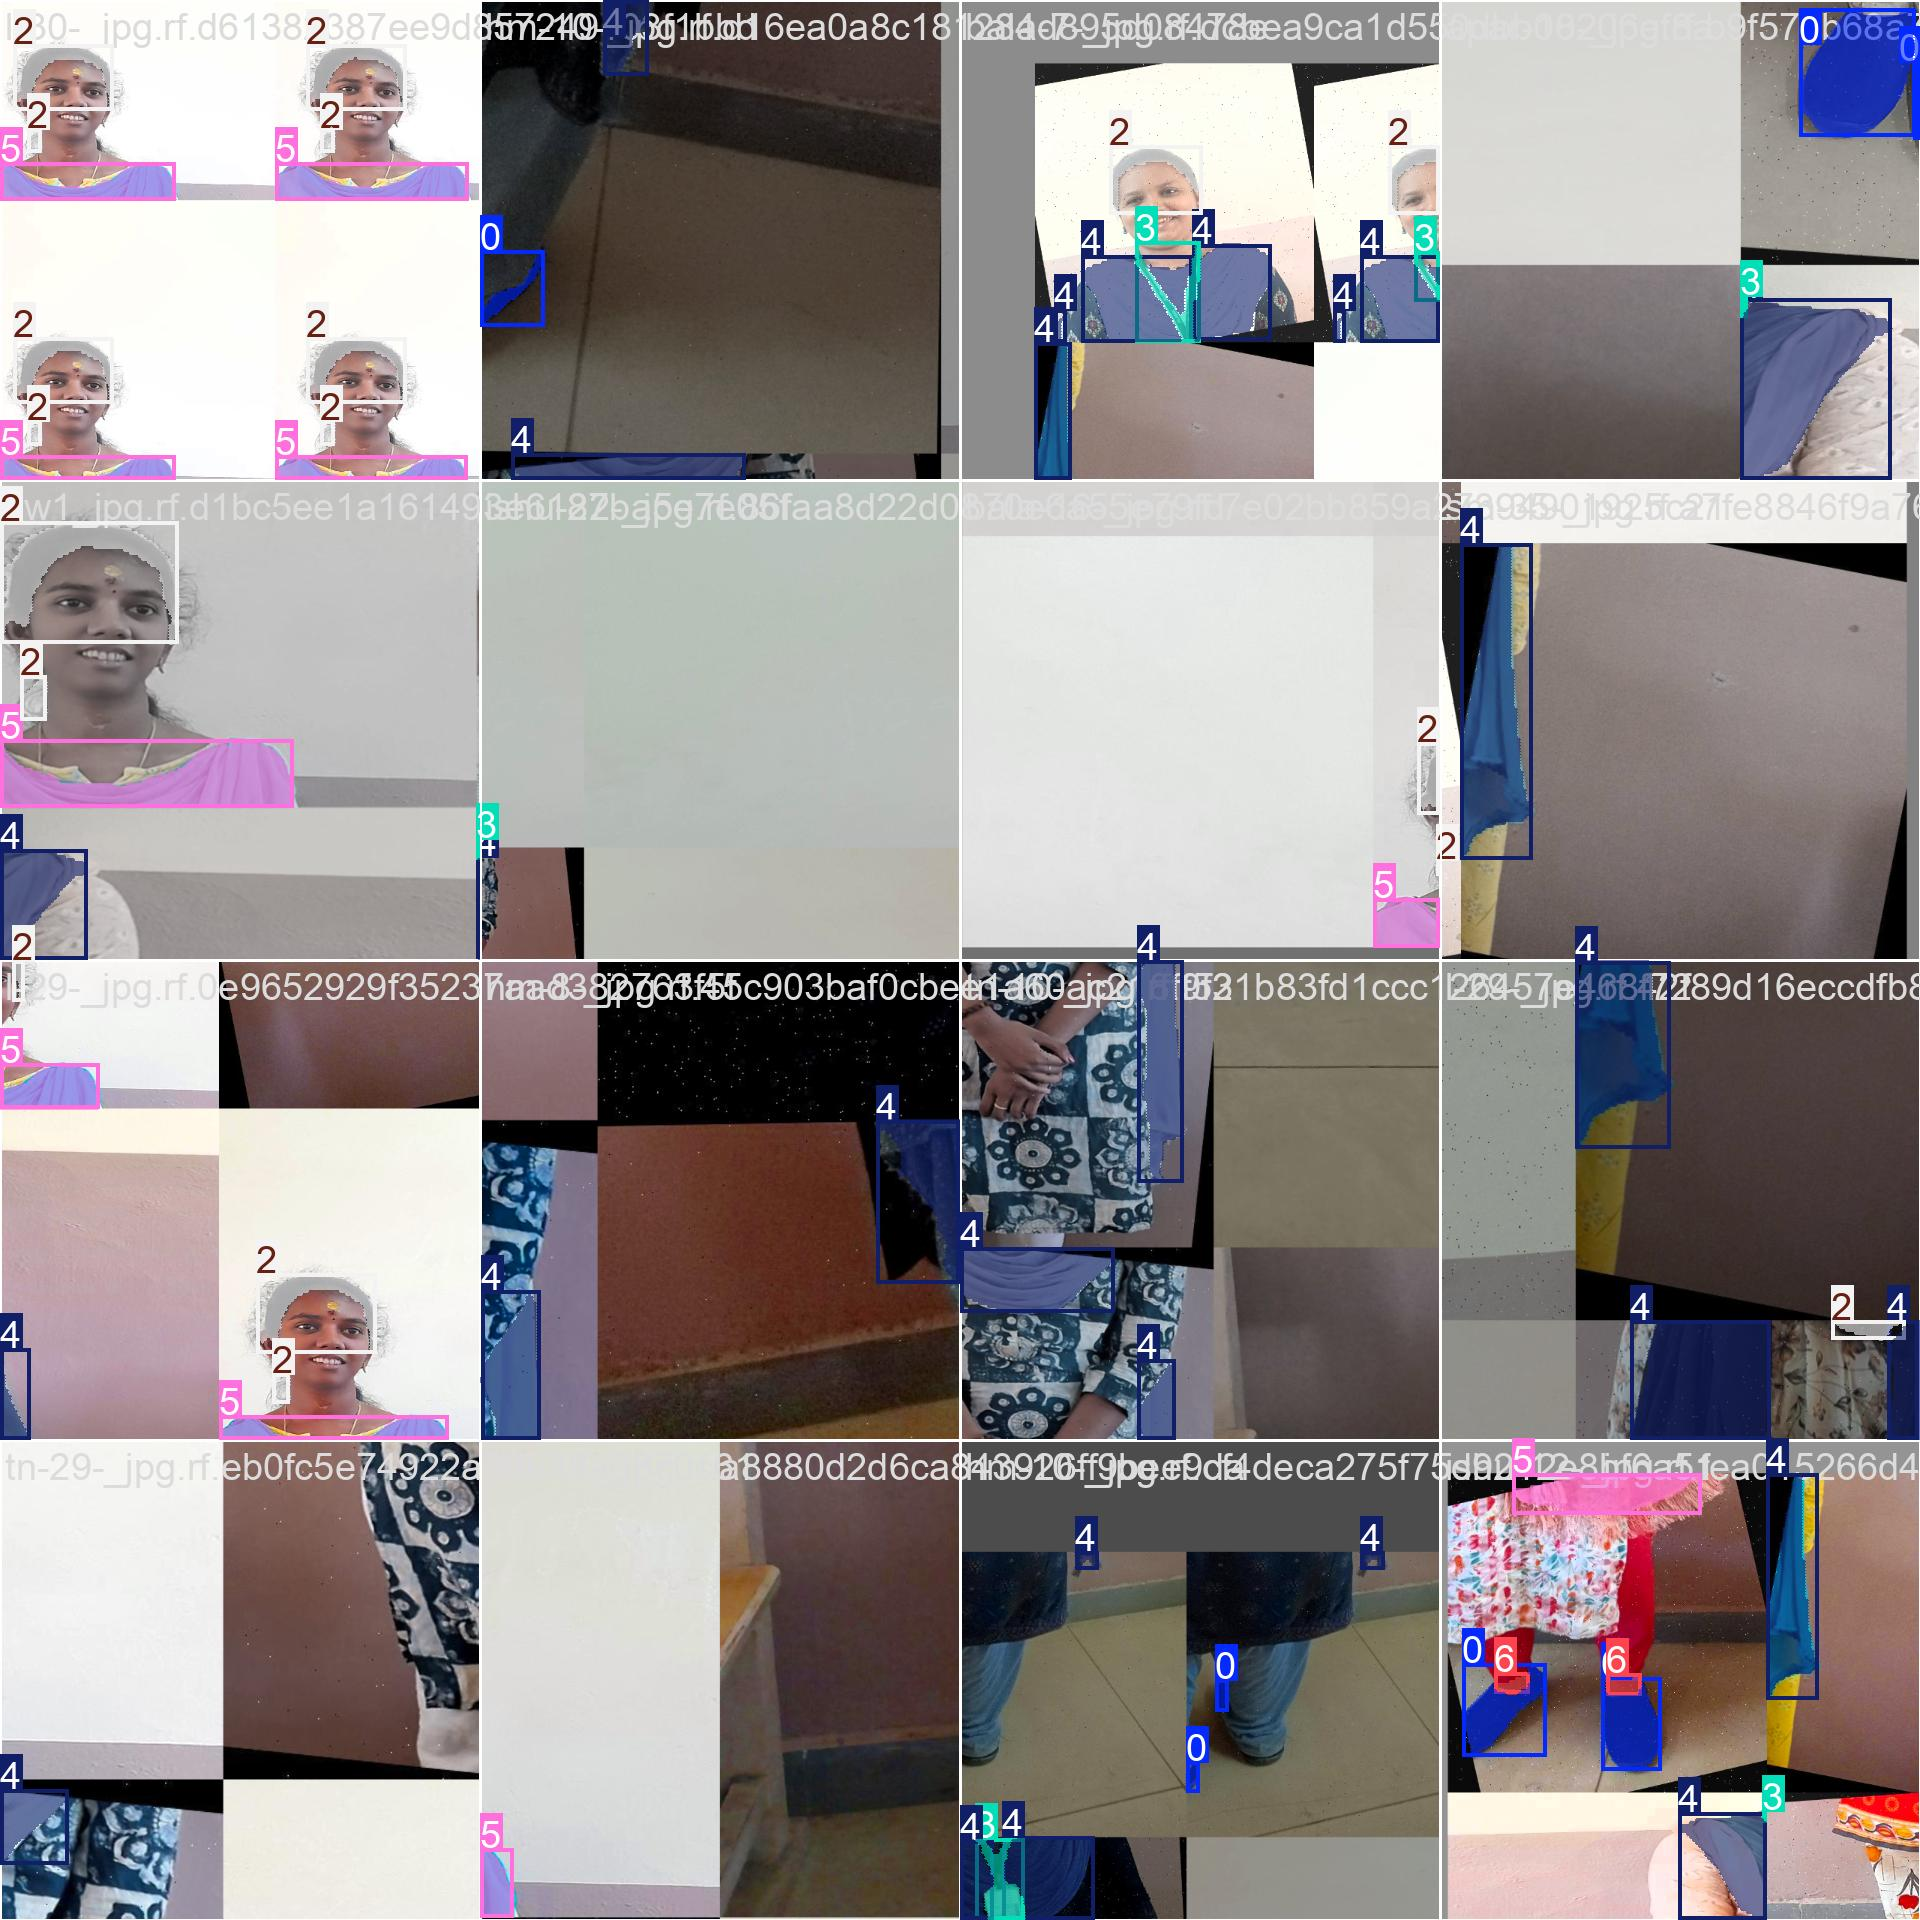

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch0.jpg", width=600)

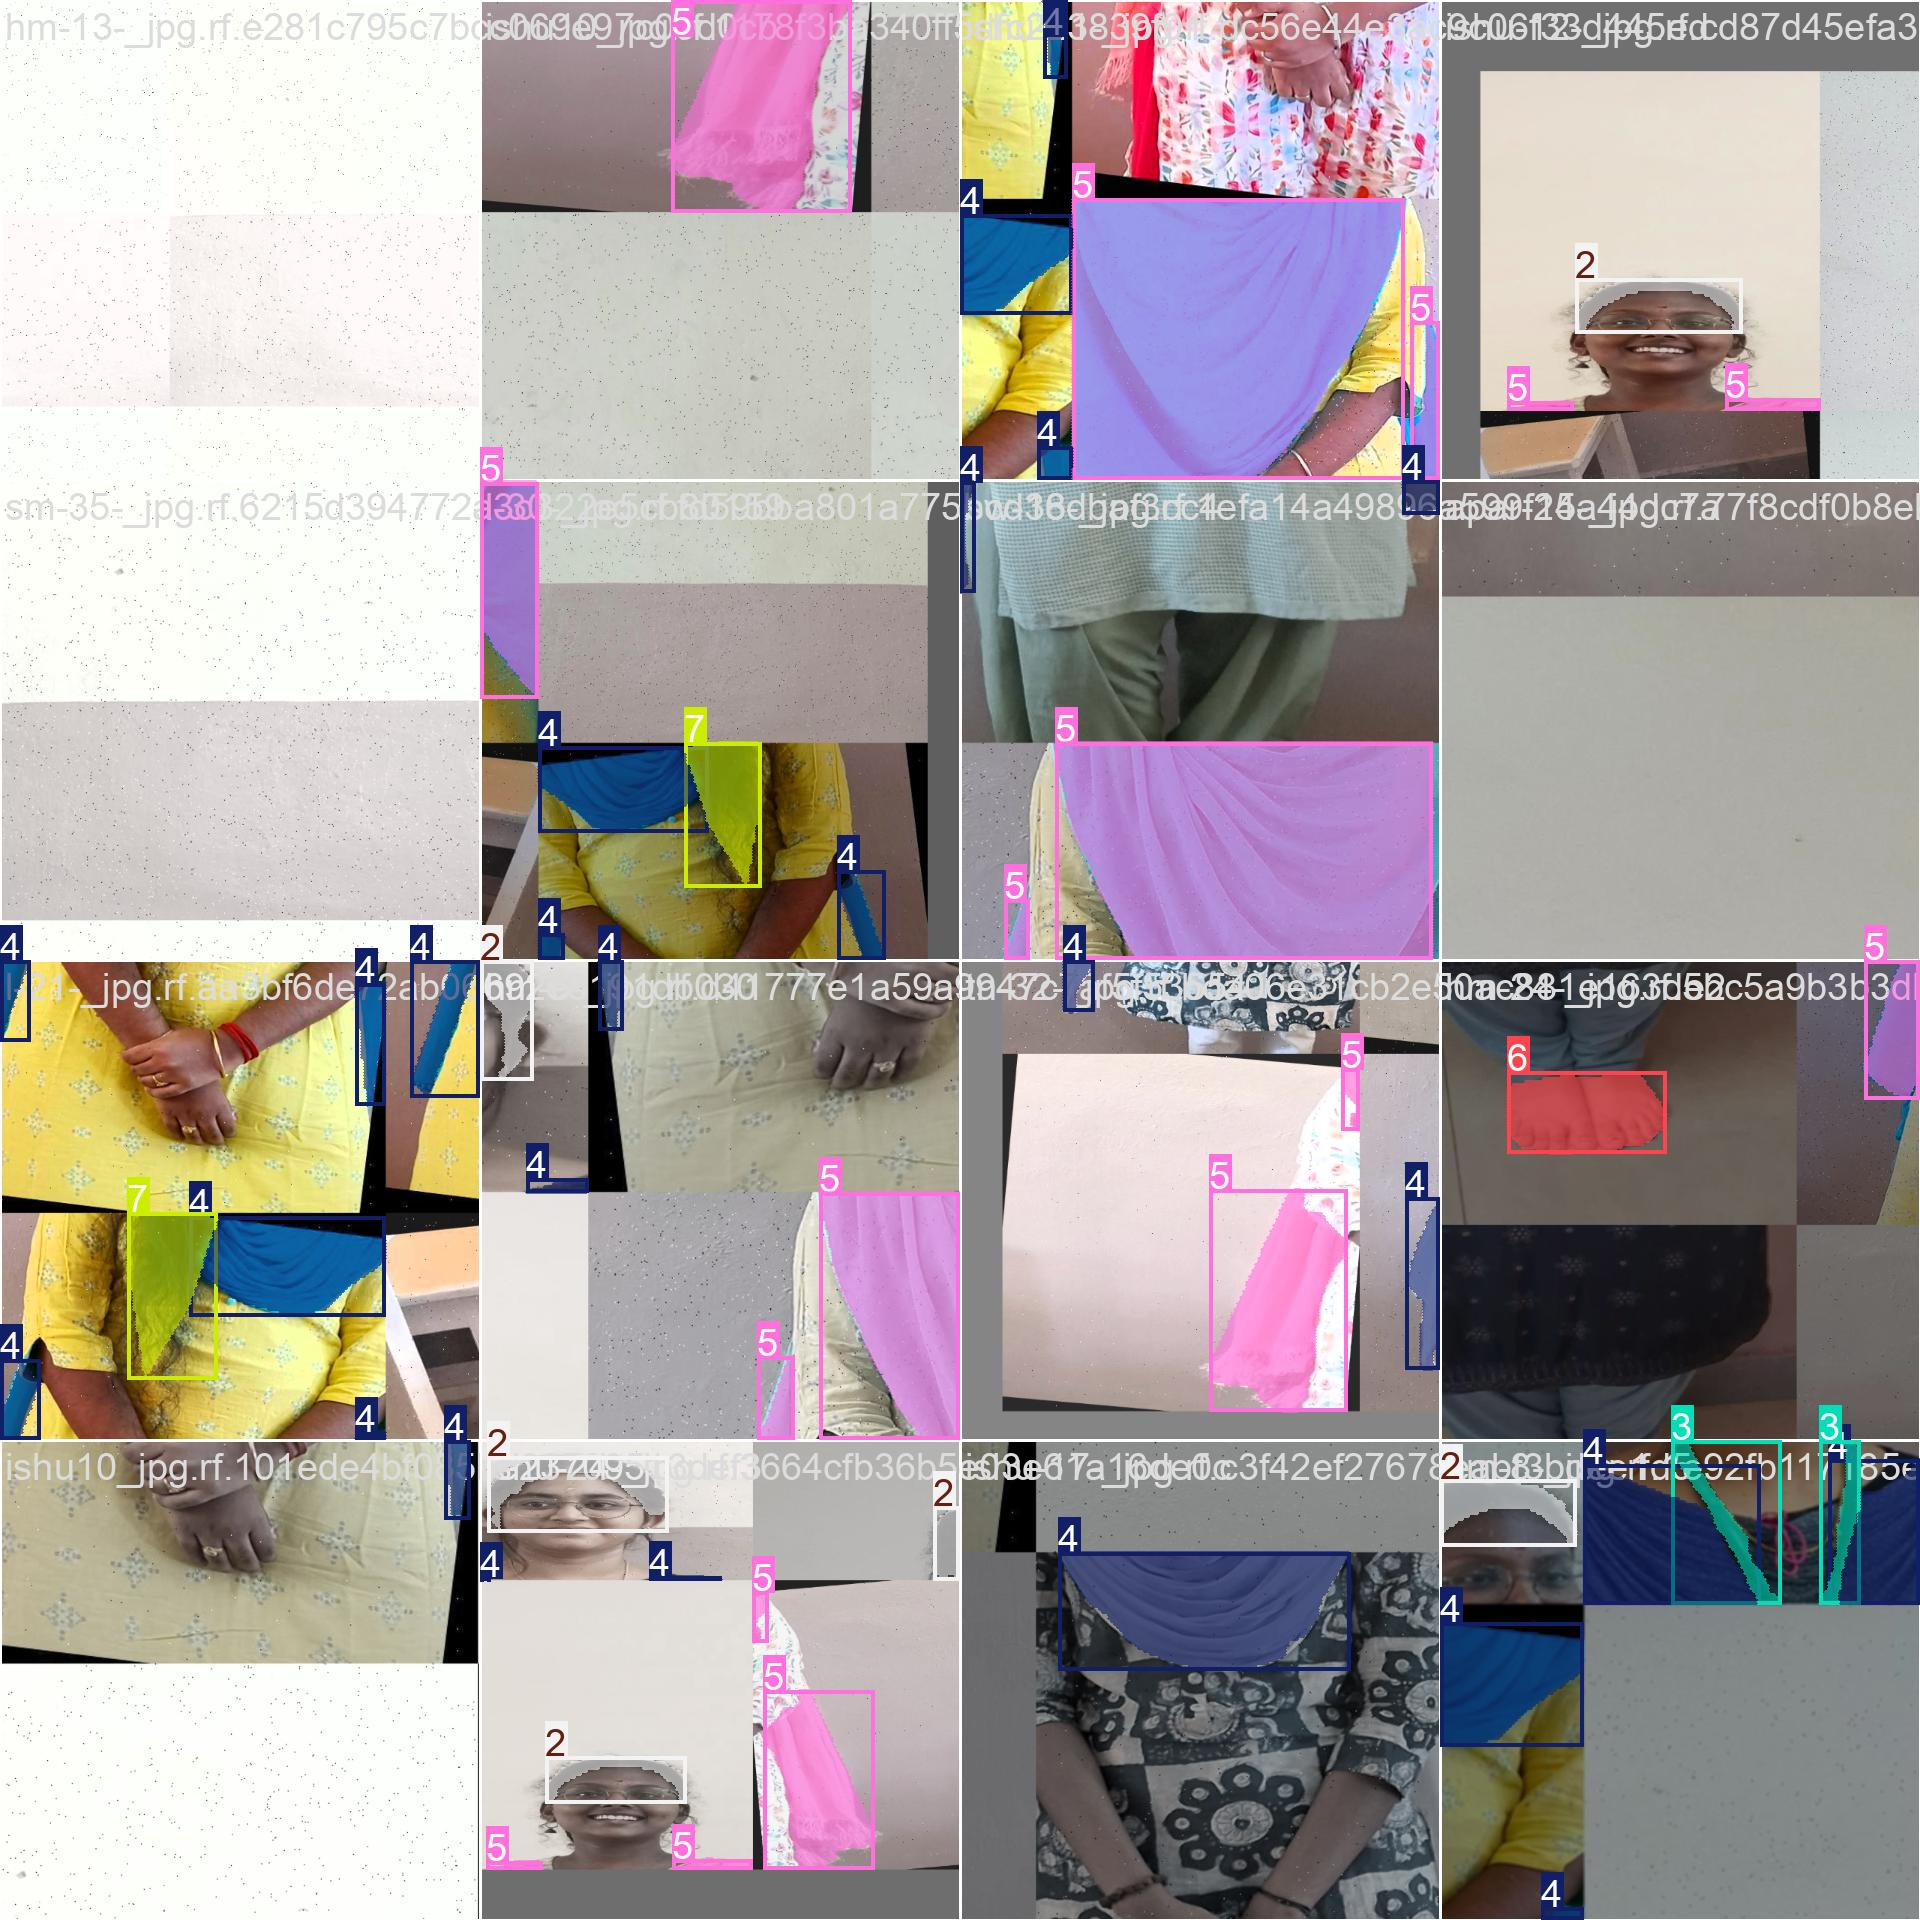

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch1.jpg", width=600)

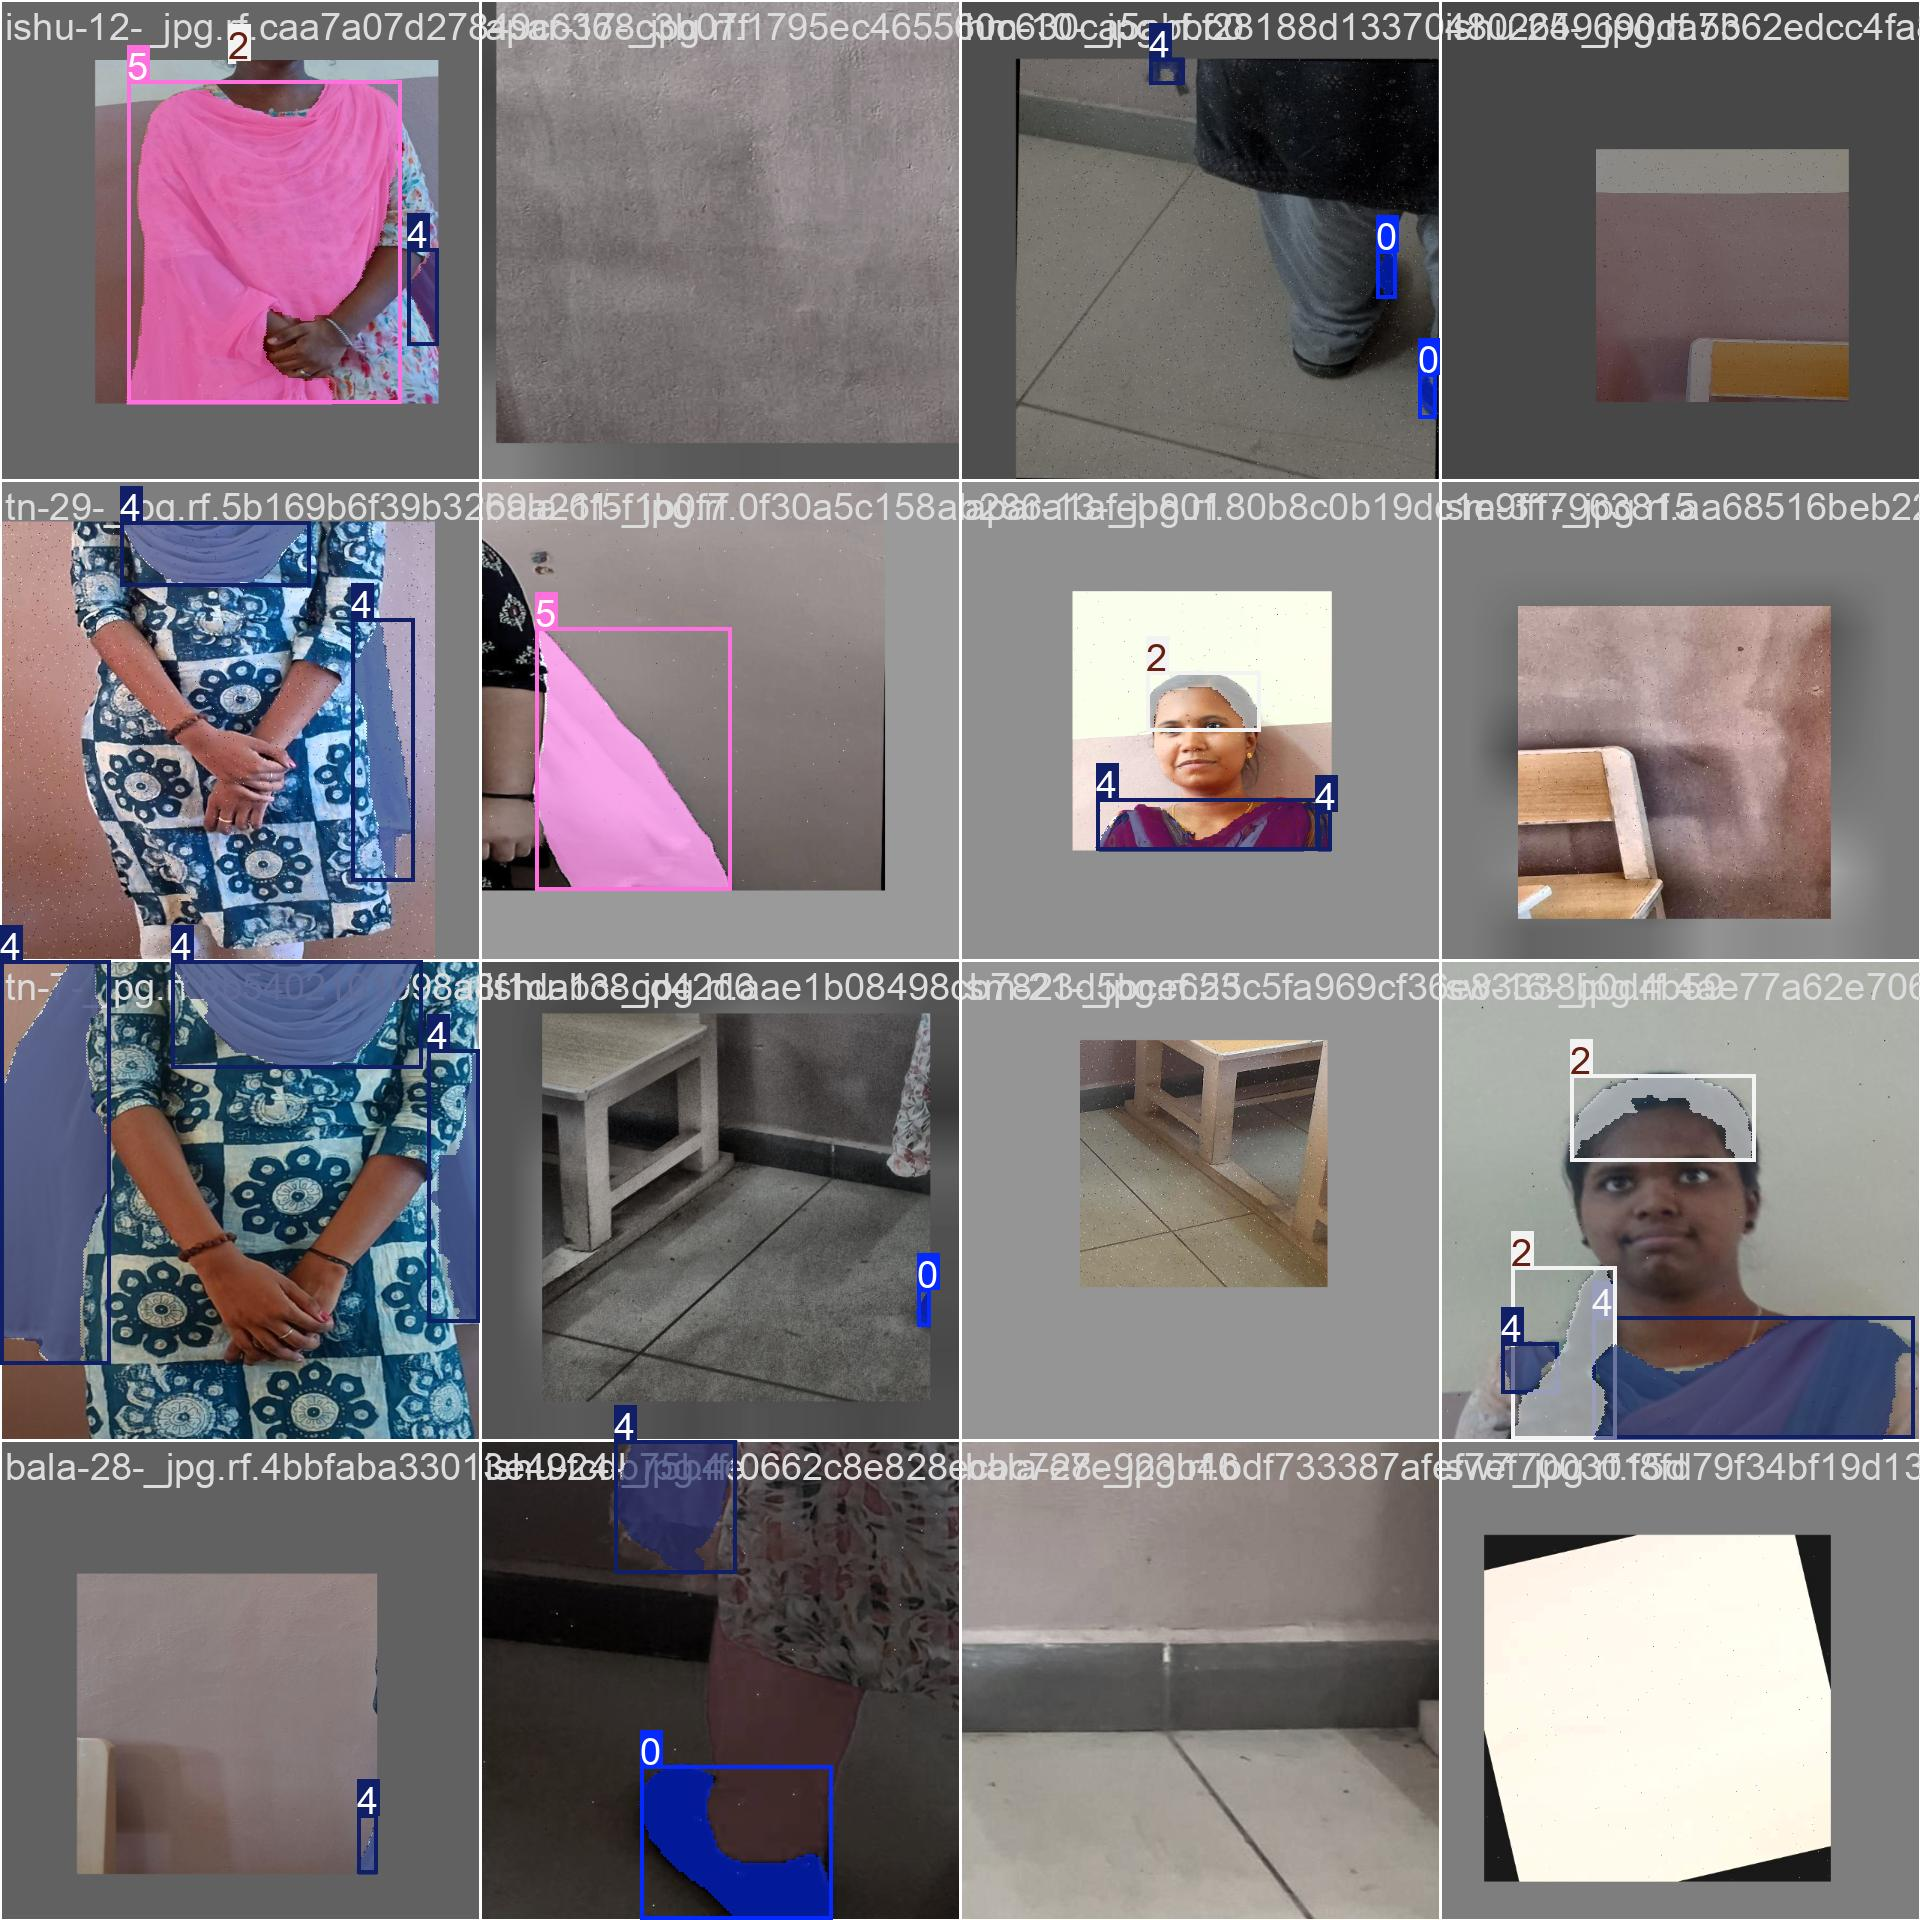

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch10260.jpg", width=600)

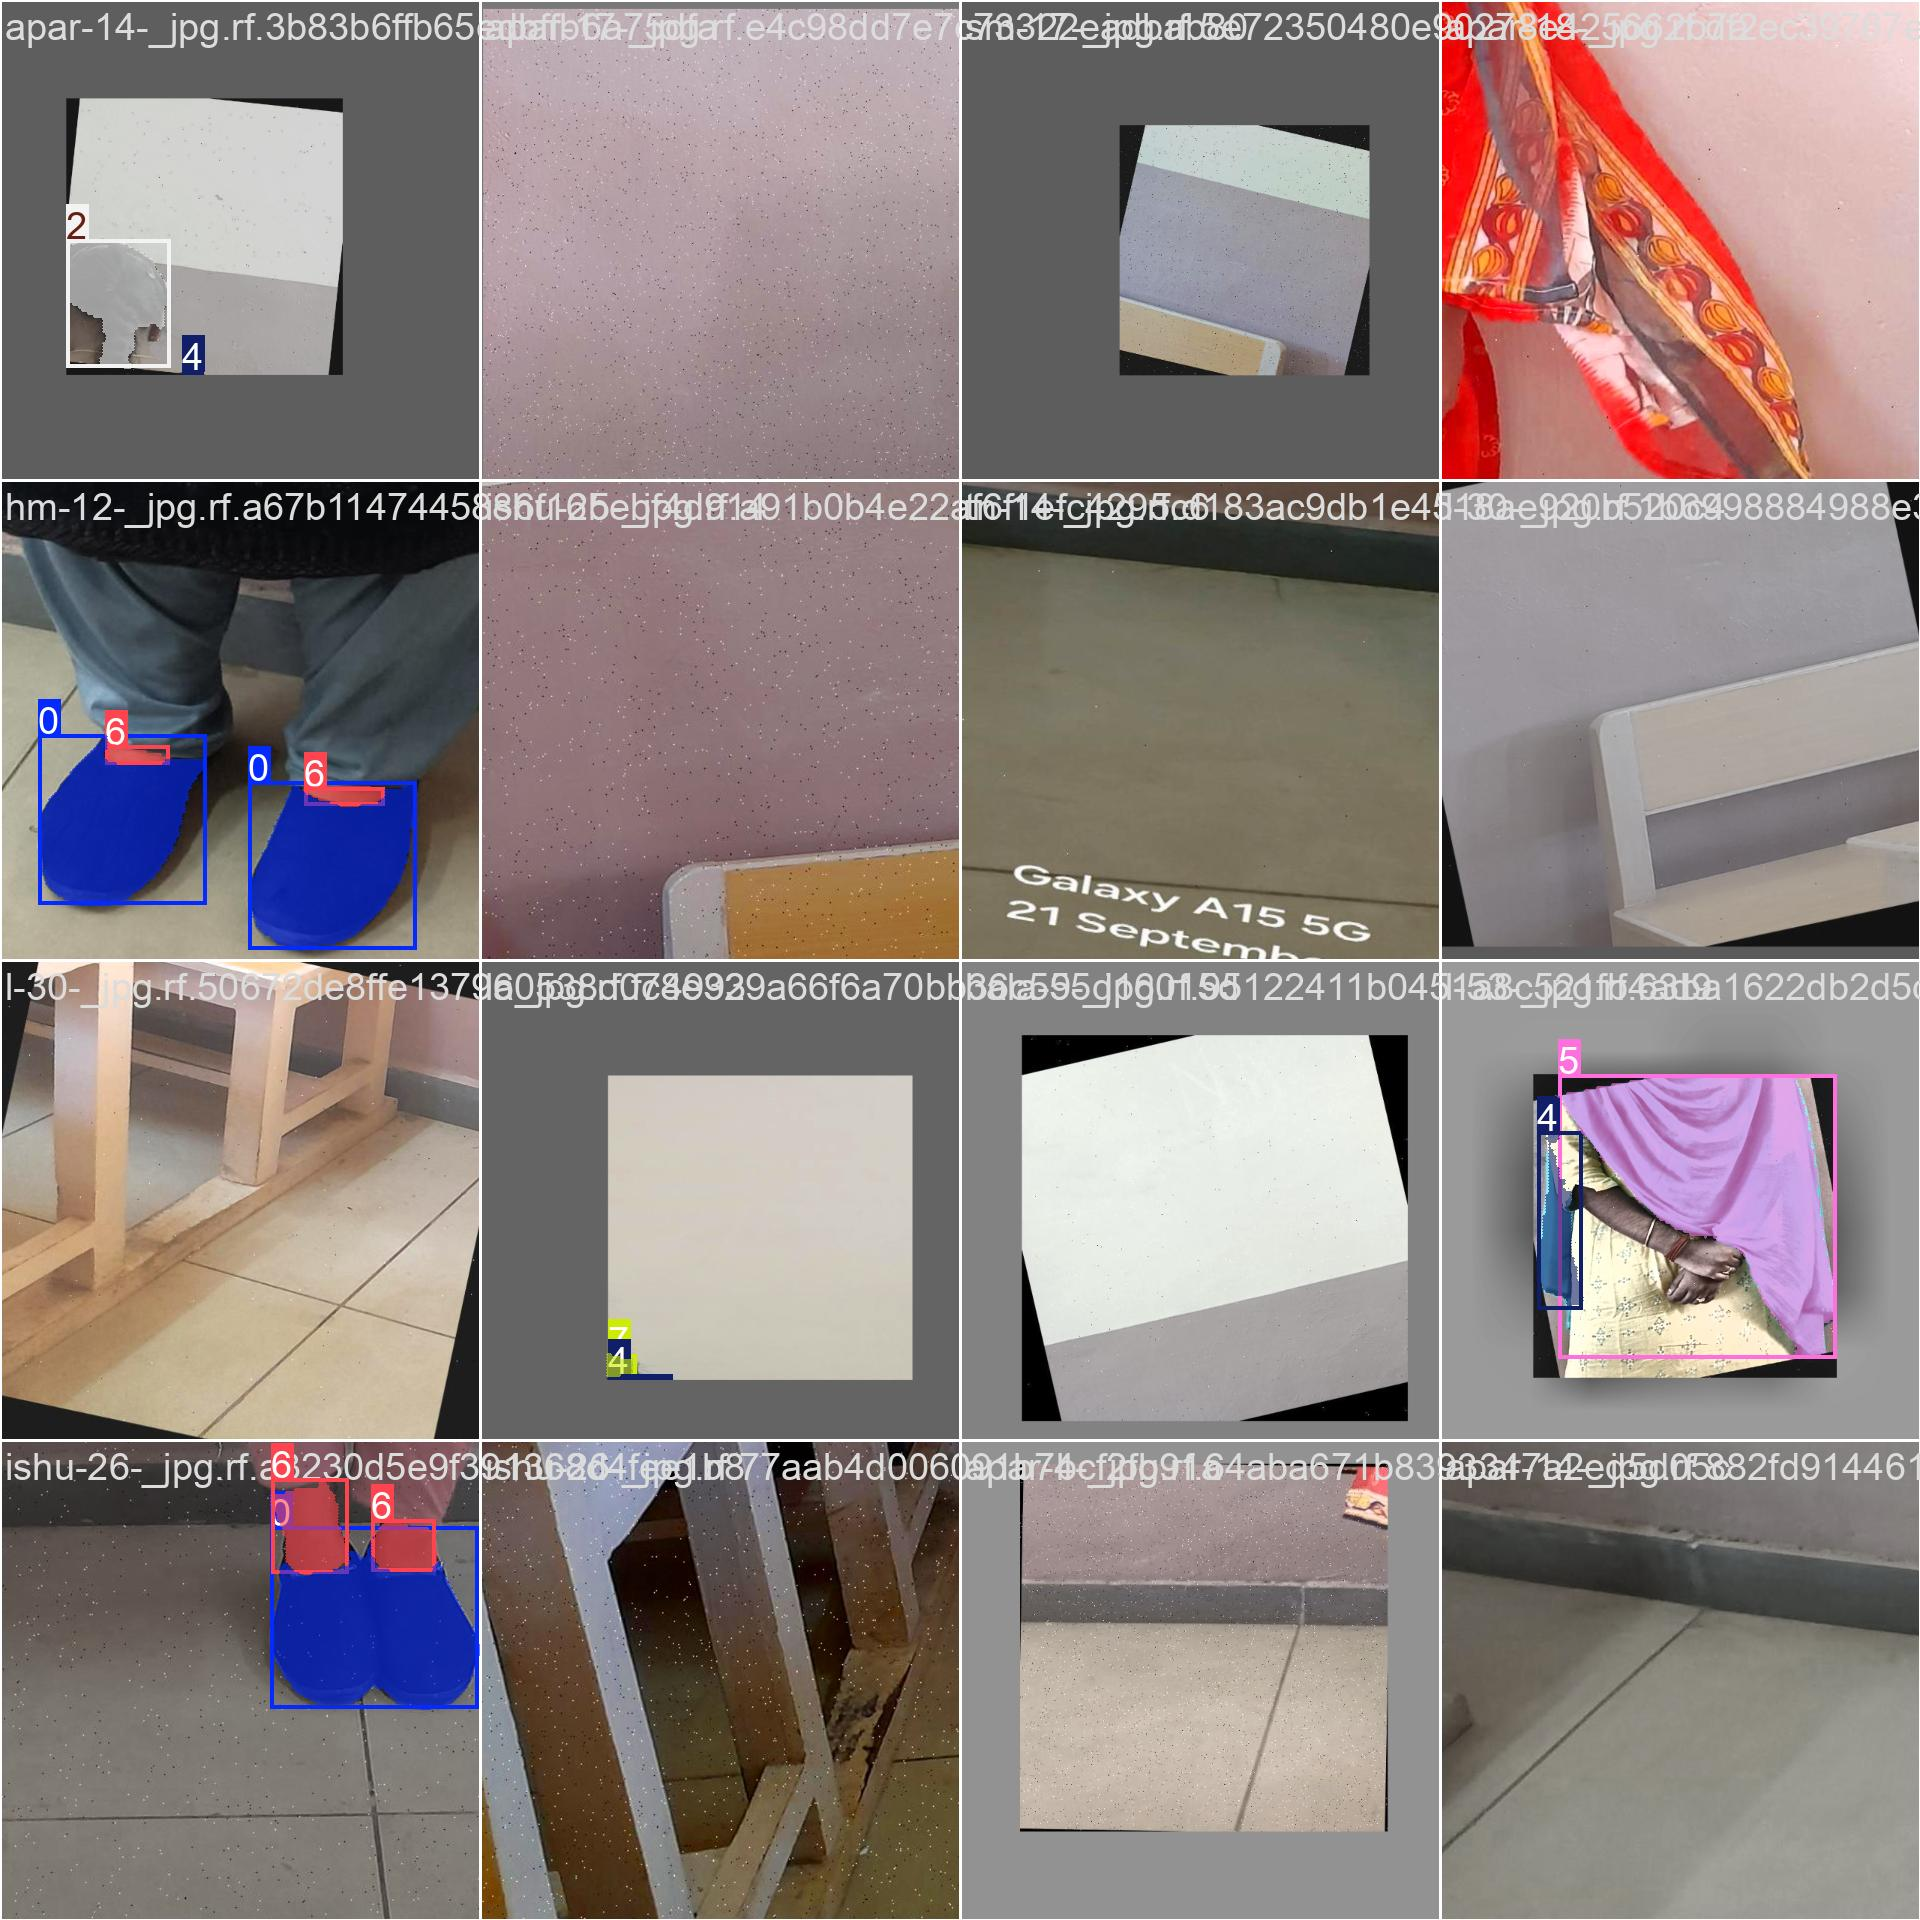

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch10261.jpg", width=600)

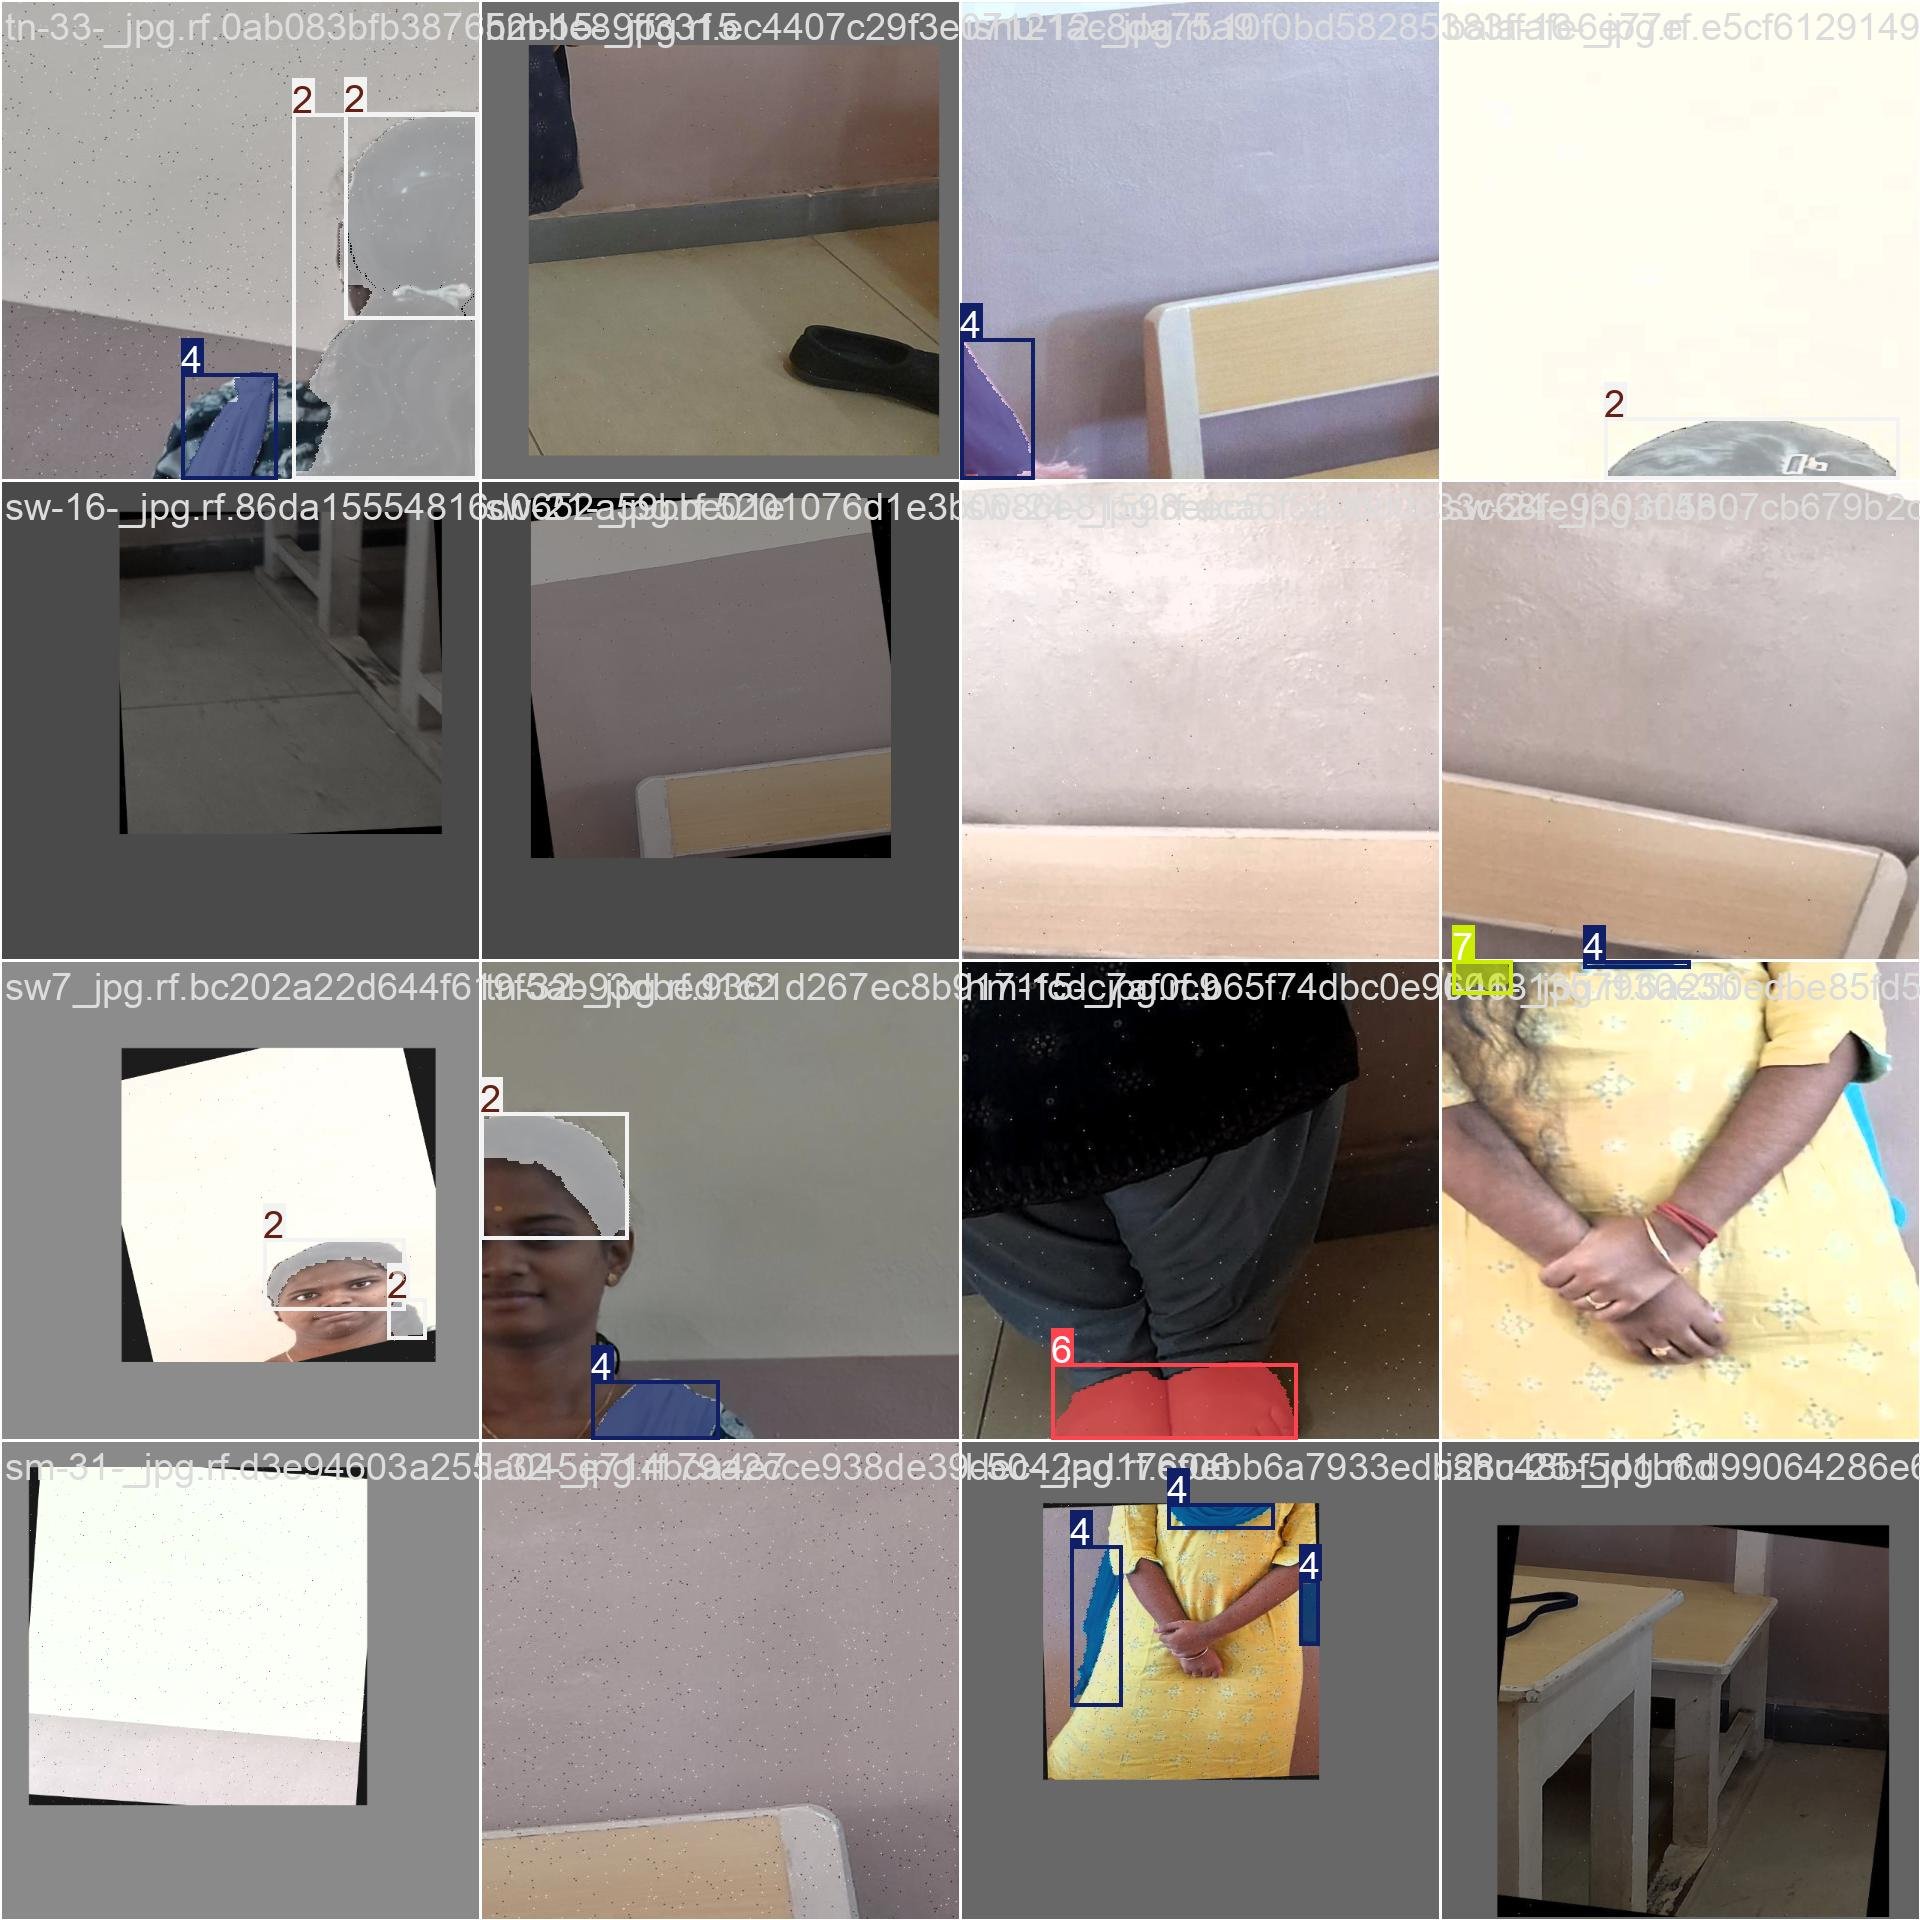

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch10262.jpg", width=600)

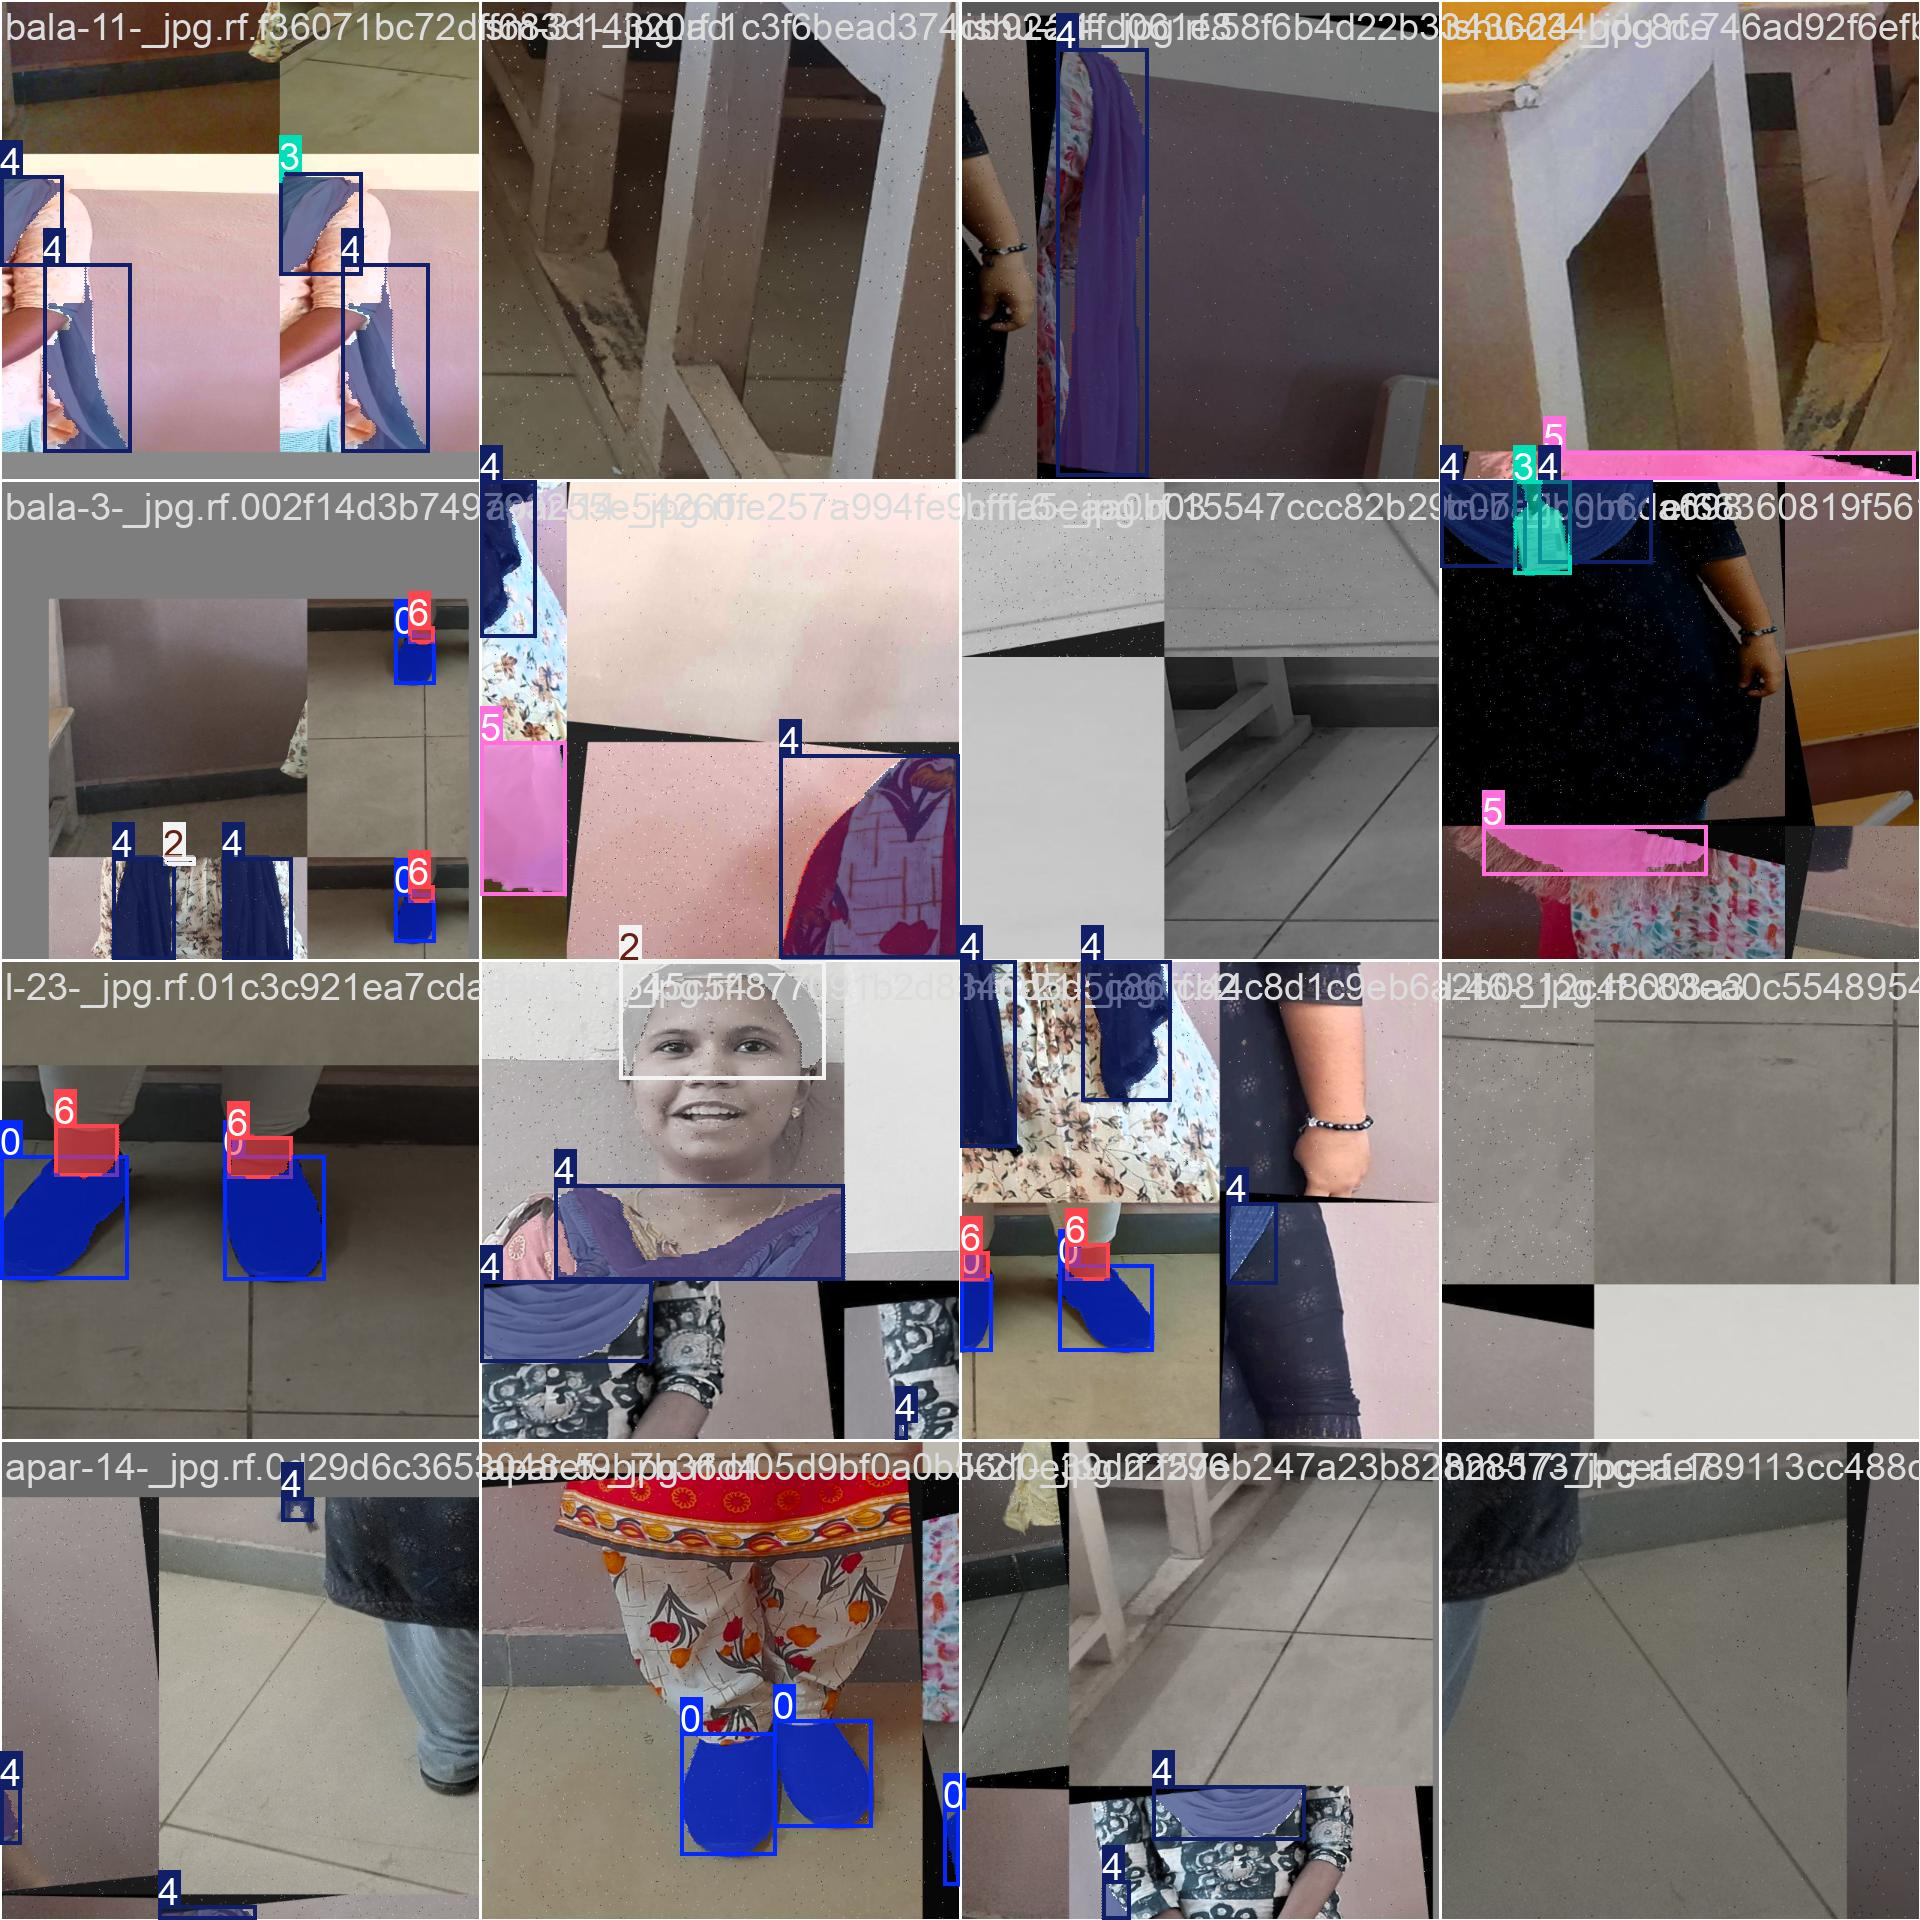

In [ ]:
Image("/content/datasets/runs/segment/train/train_batch2.jpg", width=600)

In [ ]:
!yolo task=segment mode=predict model="/content/datasets/runs/segment/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=true

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,836,128 parameters, 0 gradients, 10.2 GFLOPs

image 1/54 /content/datasets/Disciplinary-Monitoring-3/test/images/apar-2-_jpg.rf.110d4076353fbfa850c96deda1fd3676.jpg: 640x640 1 Pinned Shawl, 1 Unpinned Shawl, 17.1ms
image 2/54 /content/datasets/Disciplinary-Monitoring-3/test/images/apar-2-_jpg.rf.4ec63e63fdc956660cd4ad6adc32f9ae.jpg: 640x640 1 Groomed, 15.0ms
image 3/54 /content/datasets/Disciplinary-Monitoring-3/test/images/apar-2-_jpg.rf.a67286fc7a62e1940c49325a85fa0e89.jpg: 640x640 (no detections), 15.0ms
image 4/54 /content/datasets/Disciplinary-Monitoring-3/test/images/apar-2-_jpg.rf.aca86735326dd39939c656d67517c2fd.jpg: 640x640 1 Pinned Shawl, 20.8ms
image 5/54 /content/datasets/Disciplinary-Monitoring-3/test/images/apar-2-_jpg.rf.be66d82bd159d1962de33508452222c1.jpg: 640x640 2 Black Shoes, 16.8ms
image 6/54 /content/datasets/Disciplinary-Monitoring-3/test/i

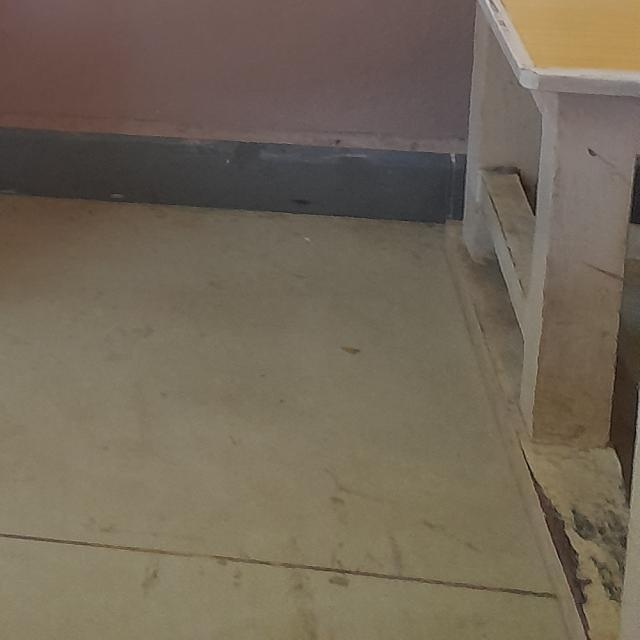

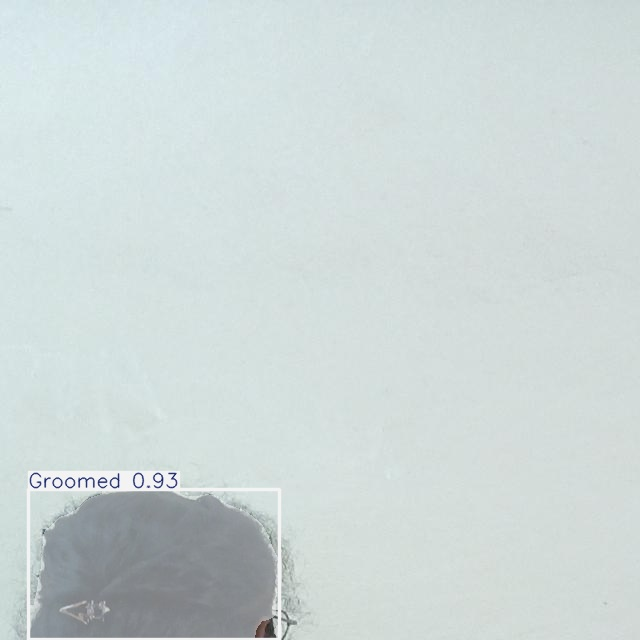

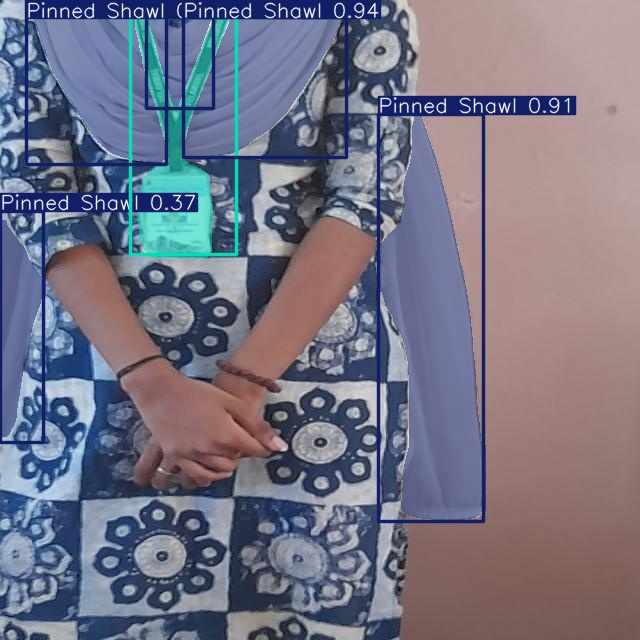

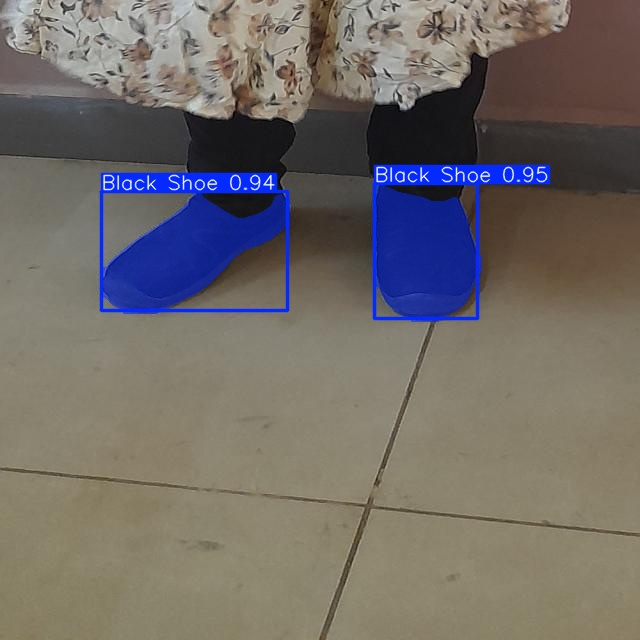

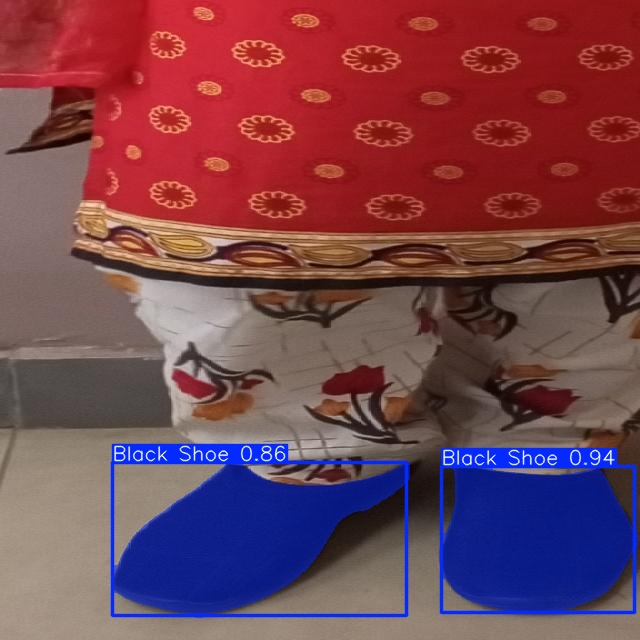

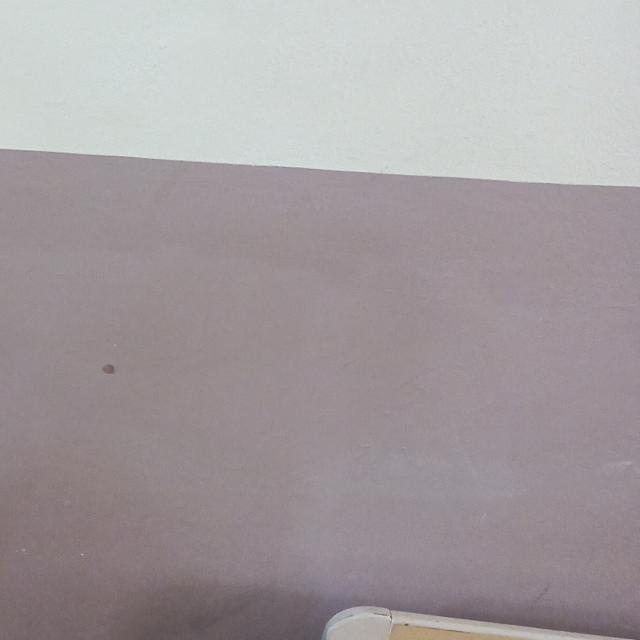

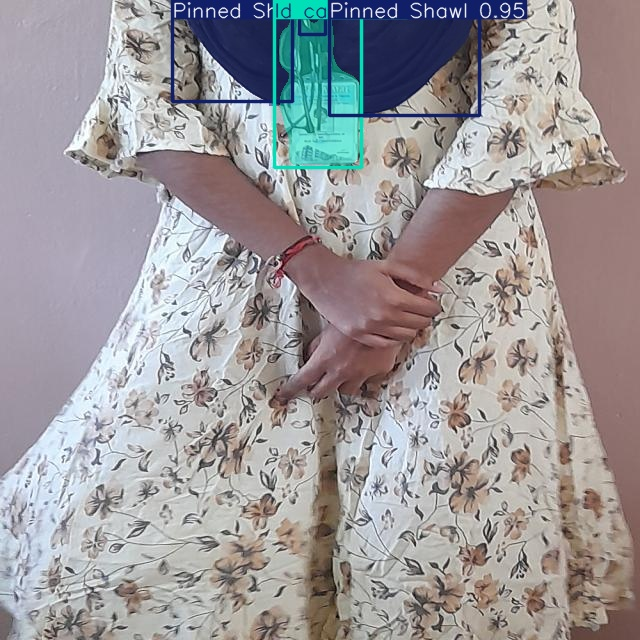

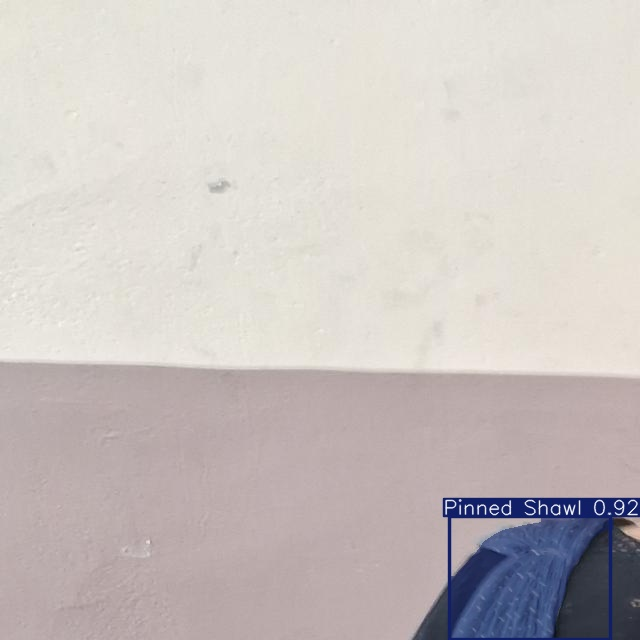

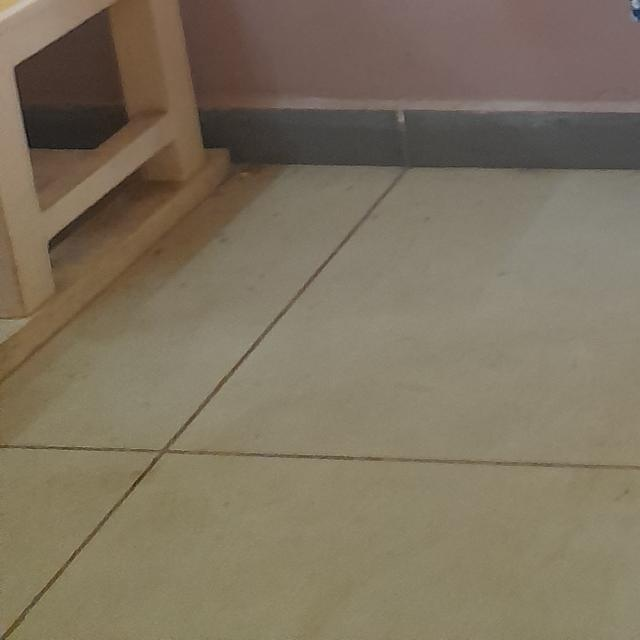

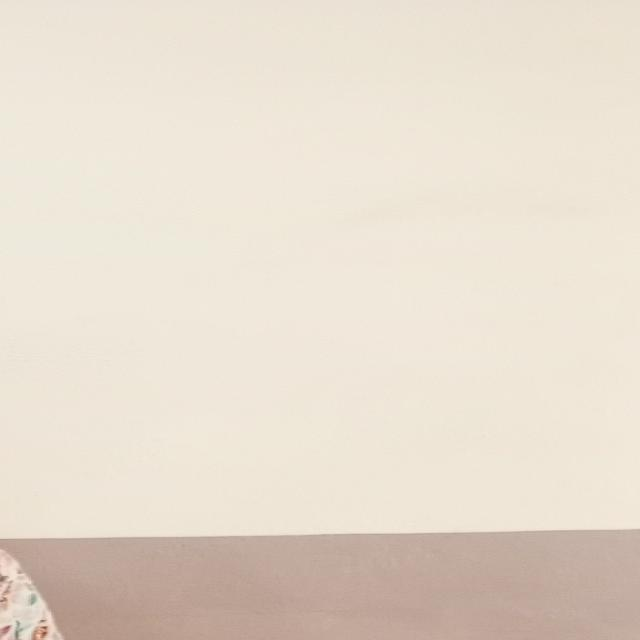

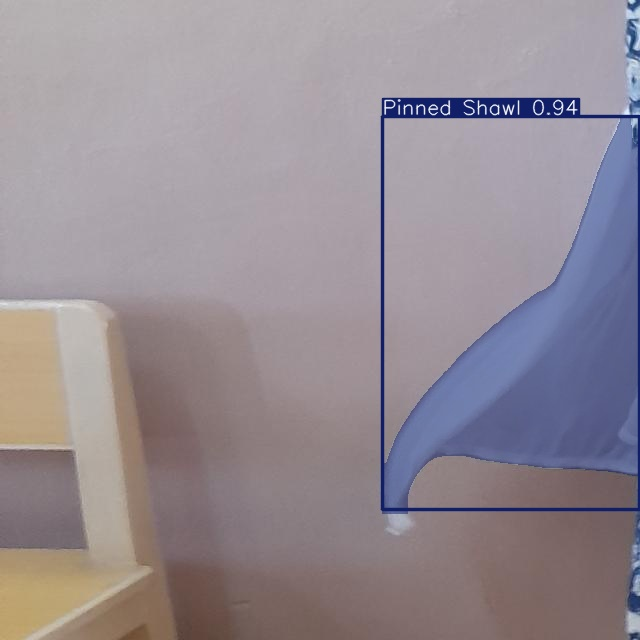

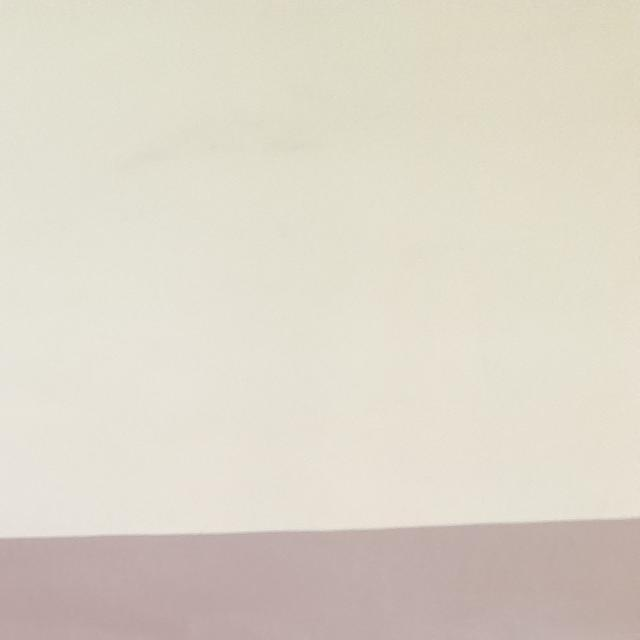

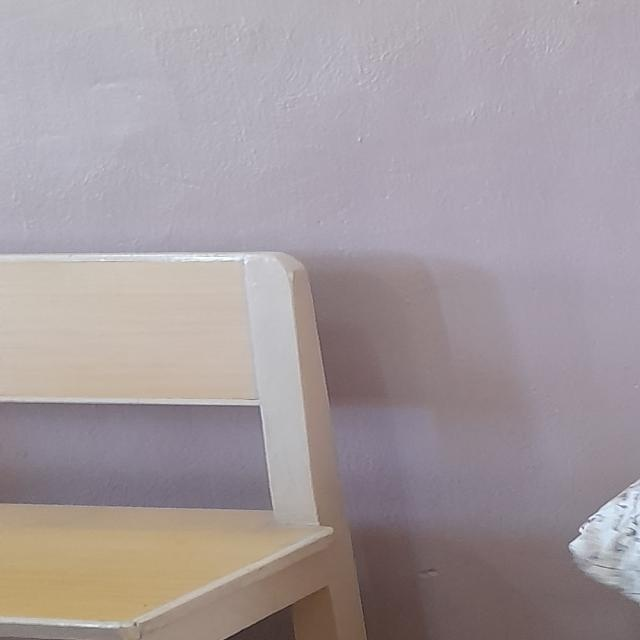

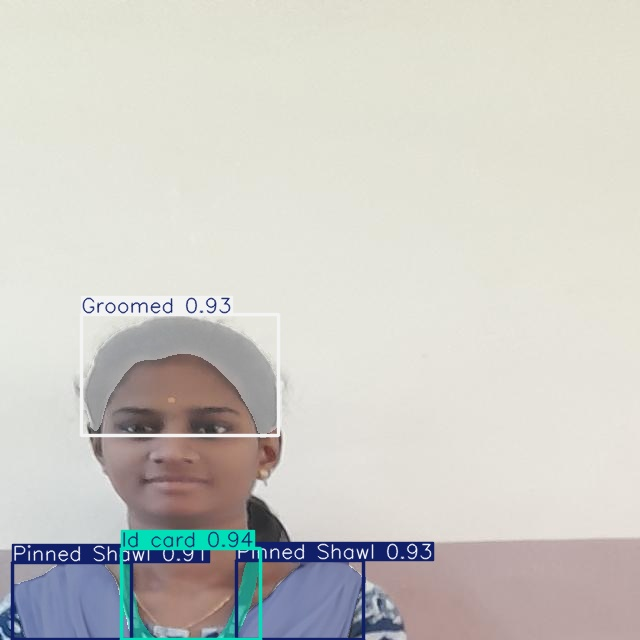

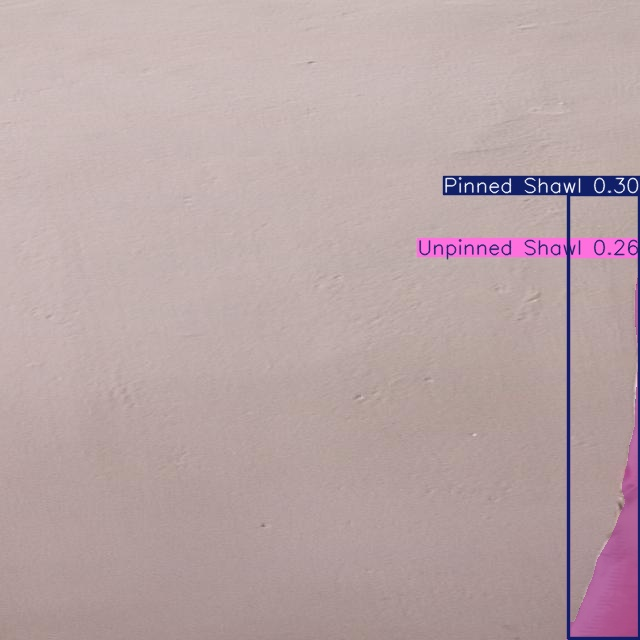

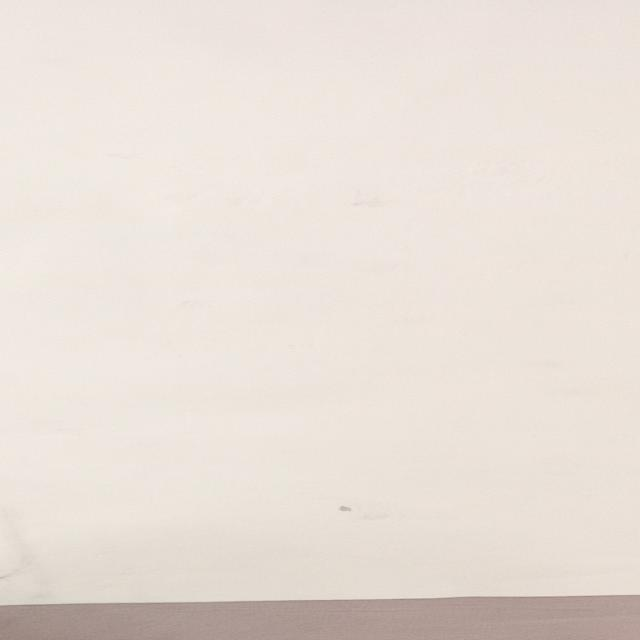

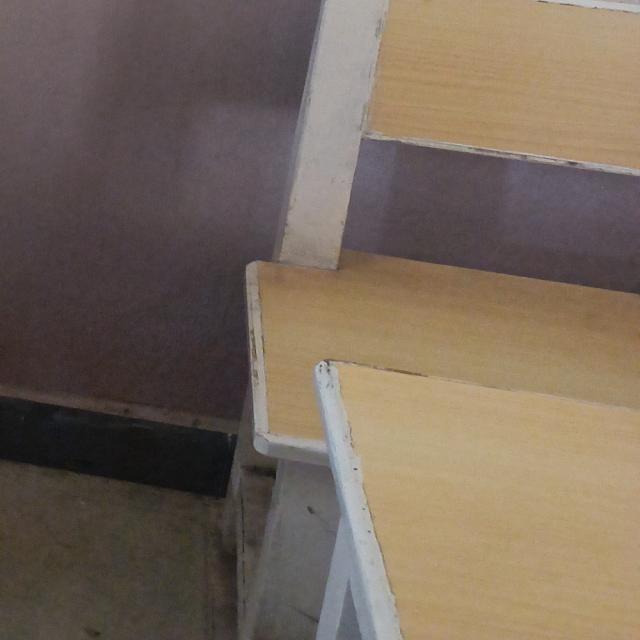

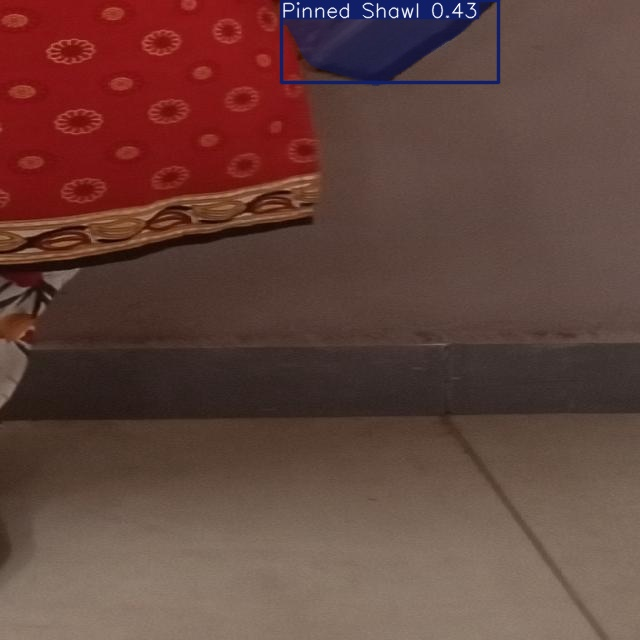

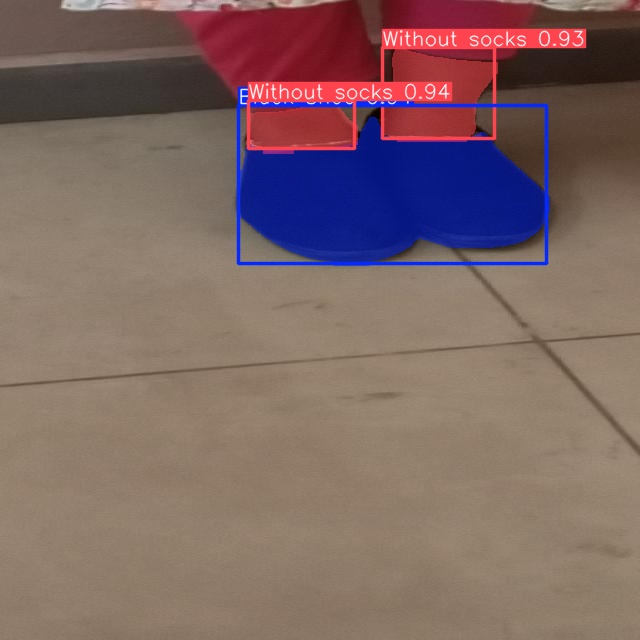

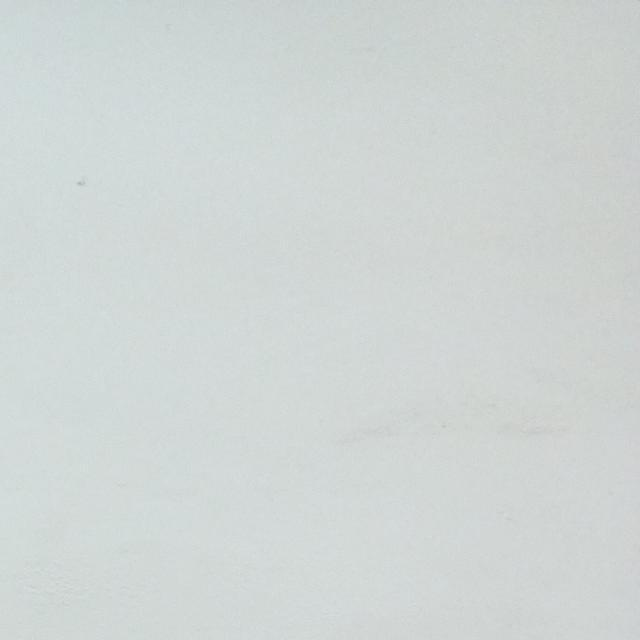

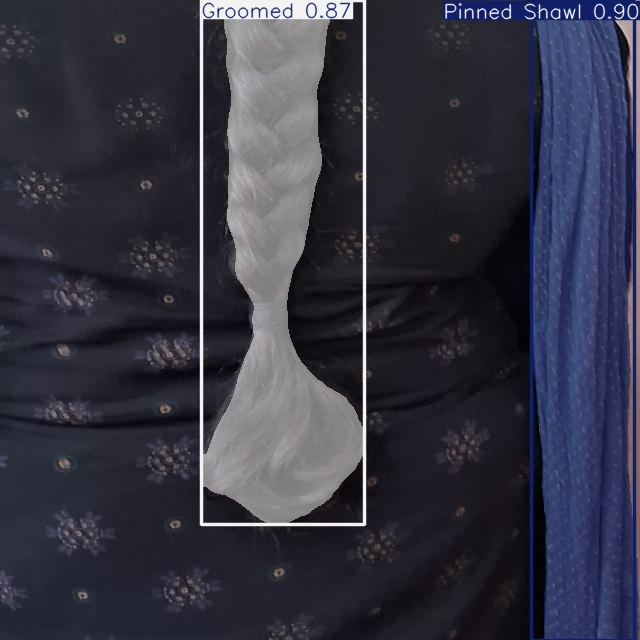

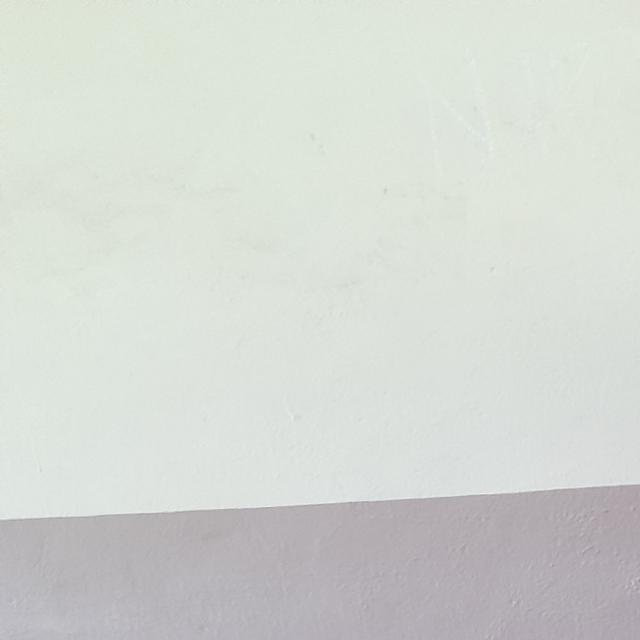

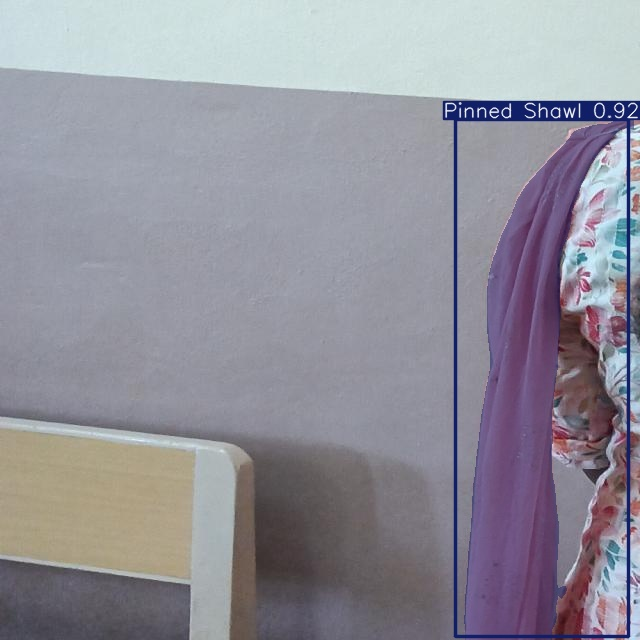

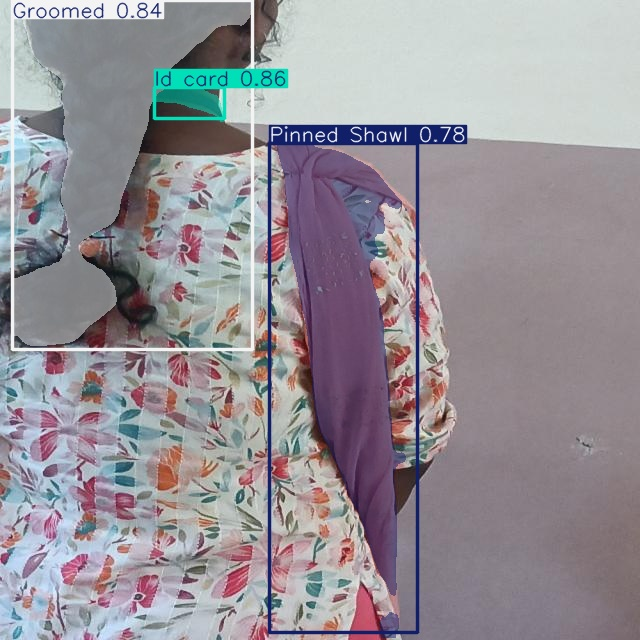

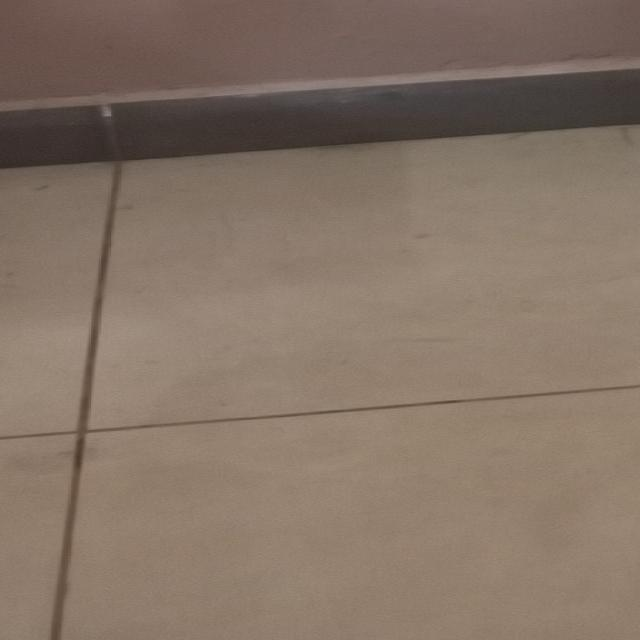

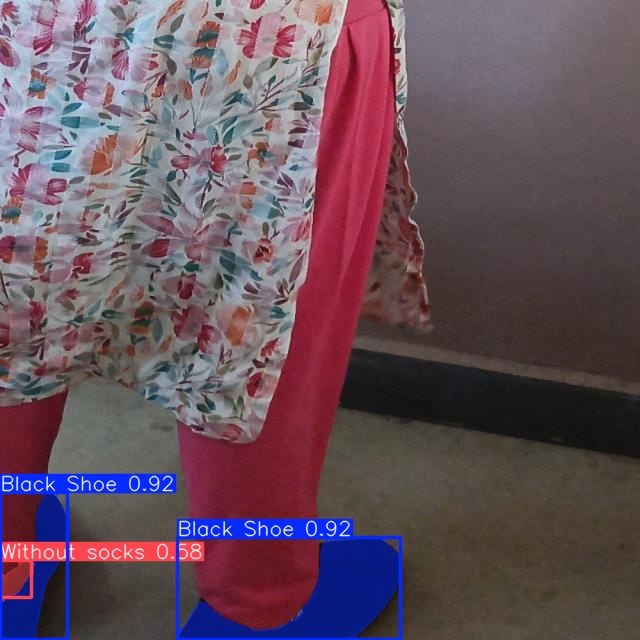

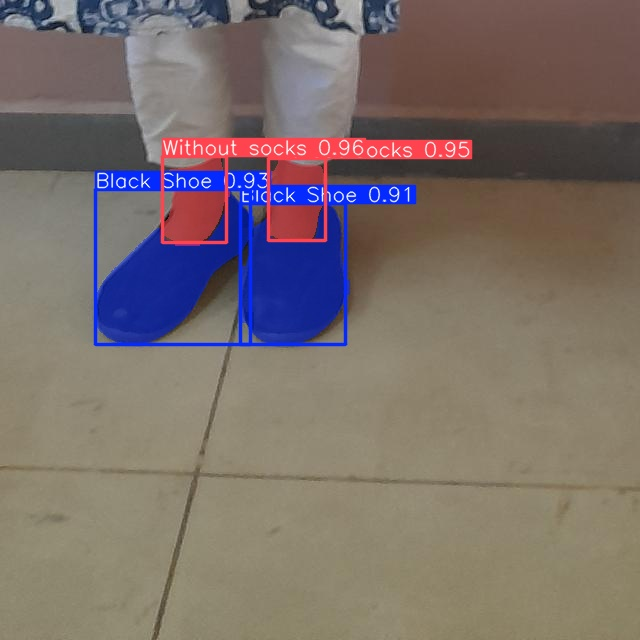

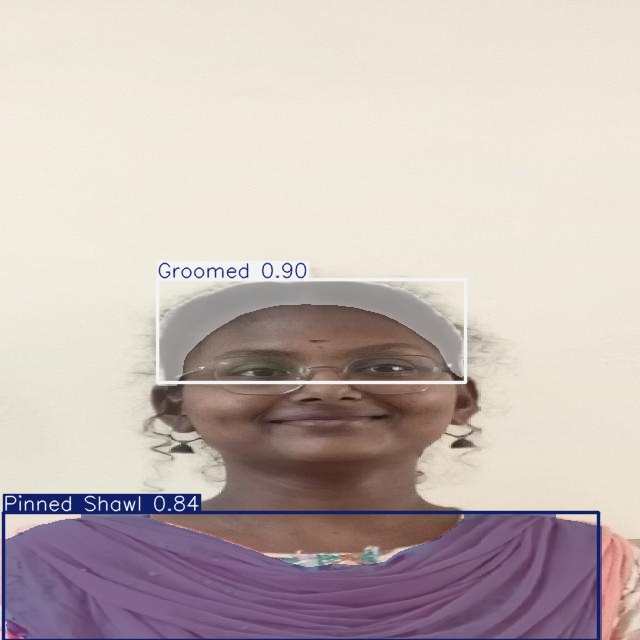

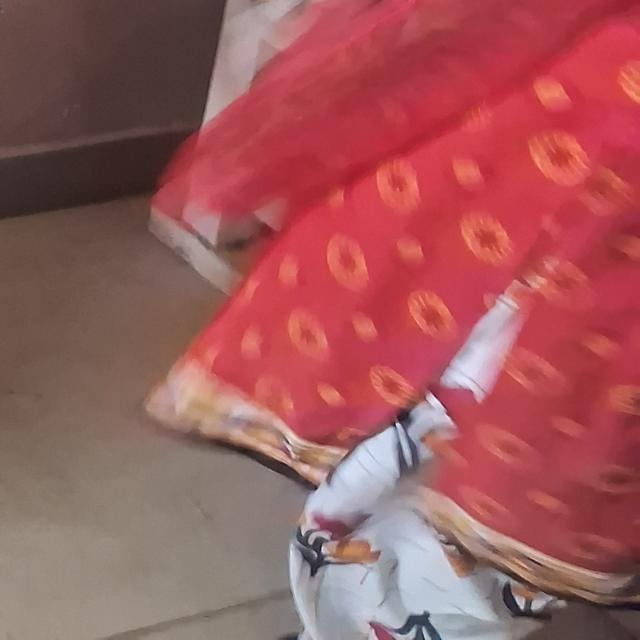

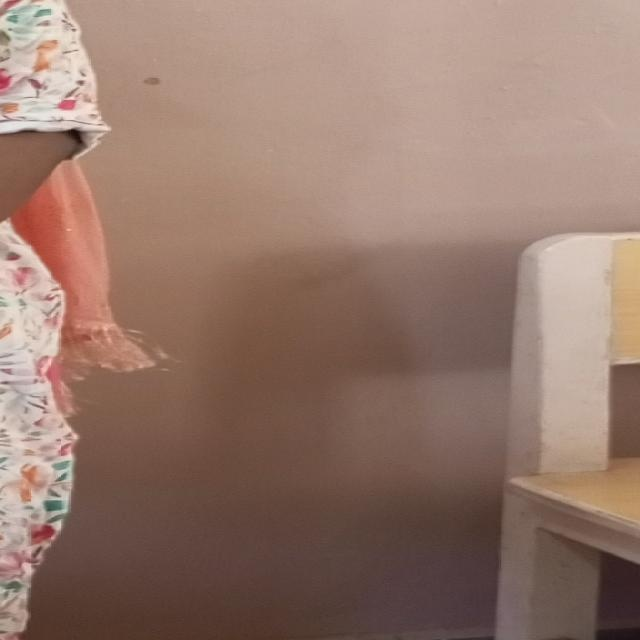

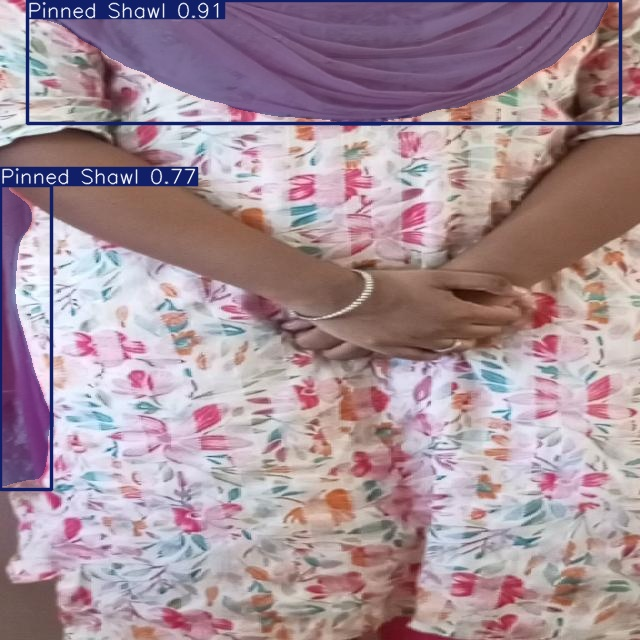

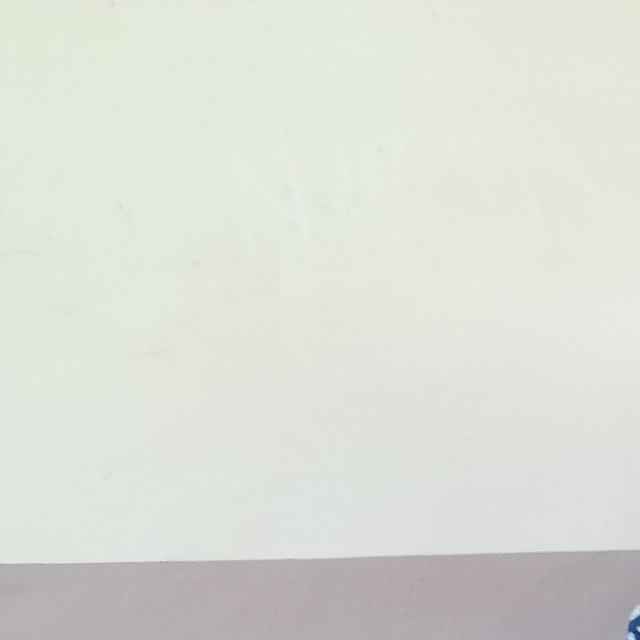

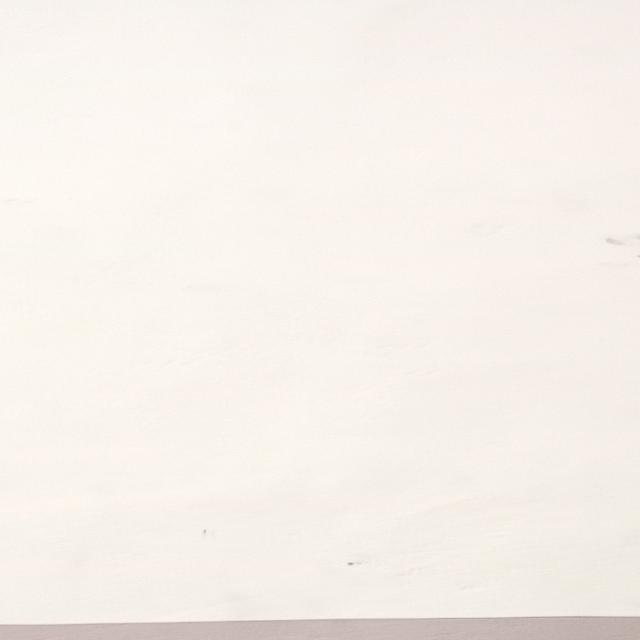

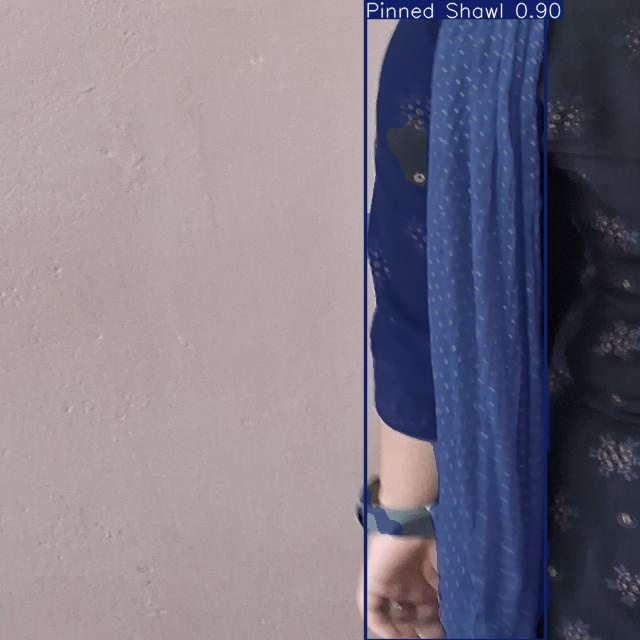

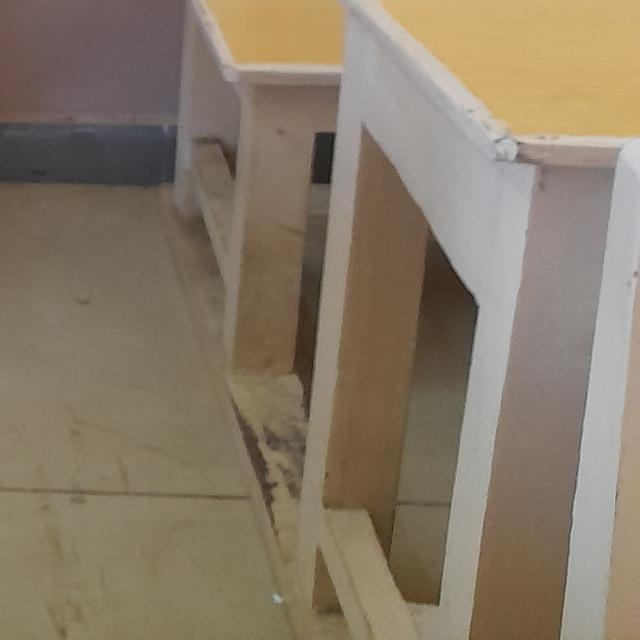

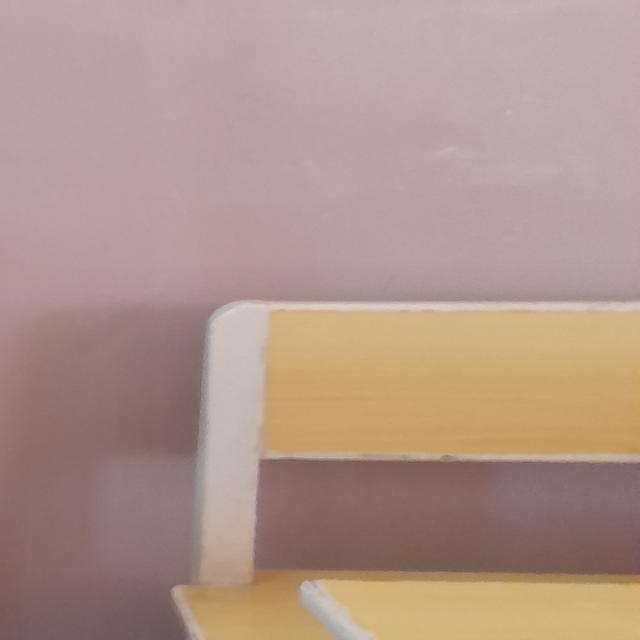

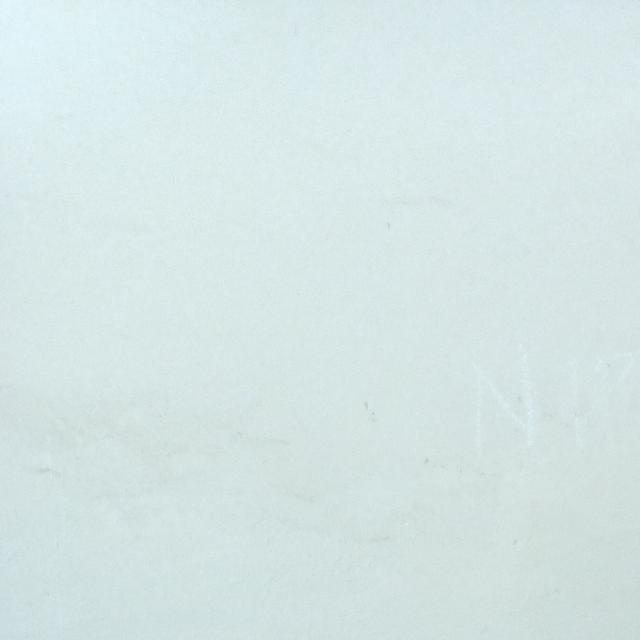

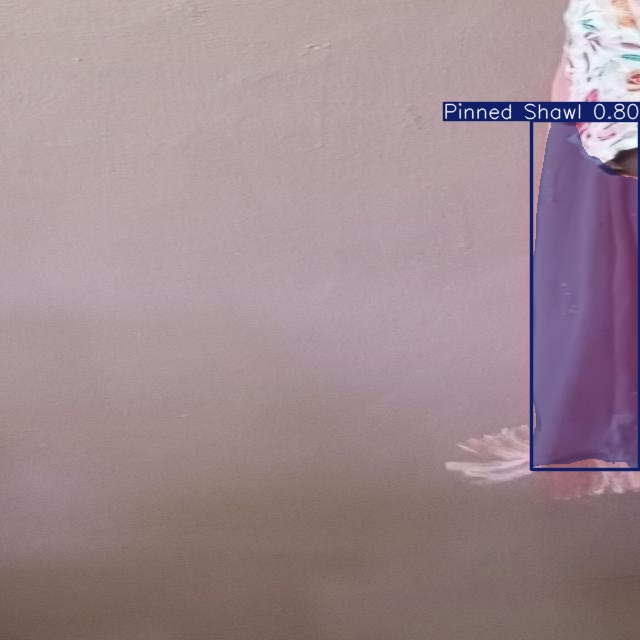

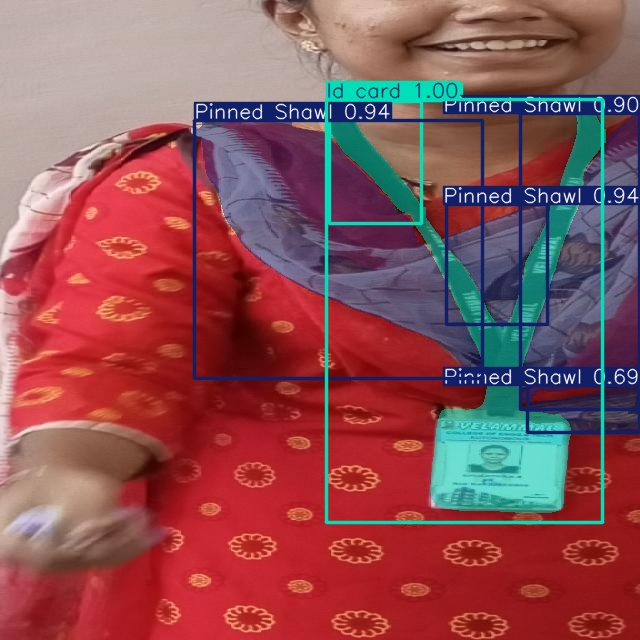

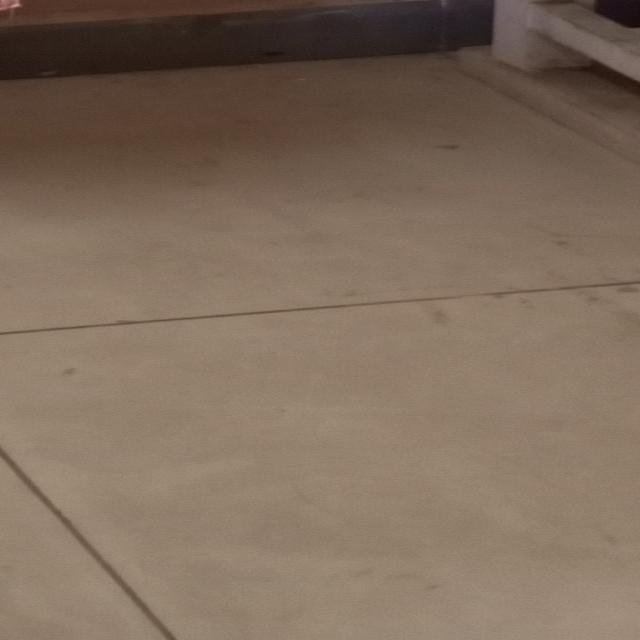

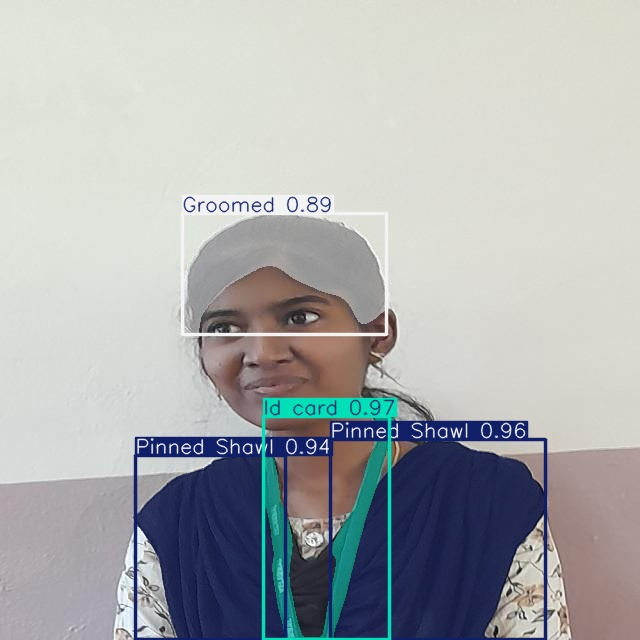

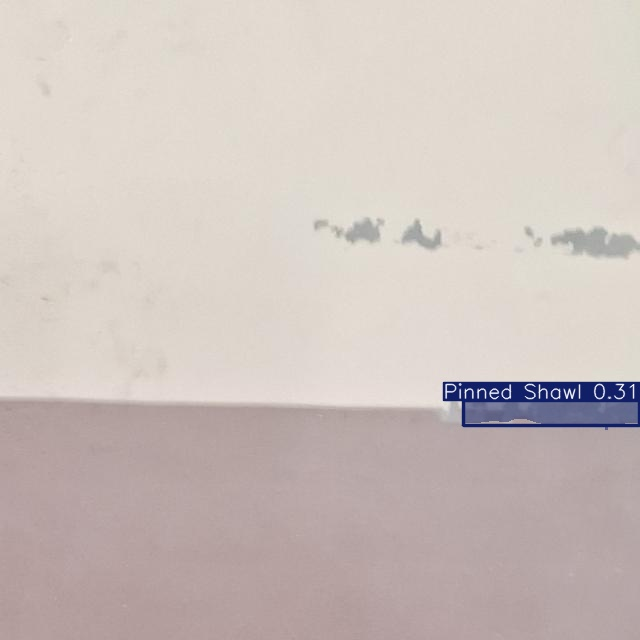

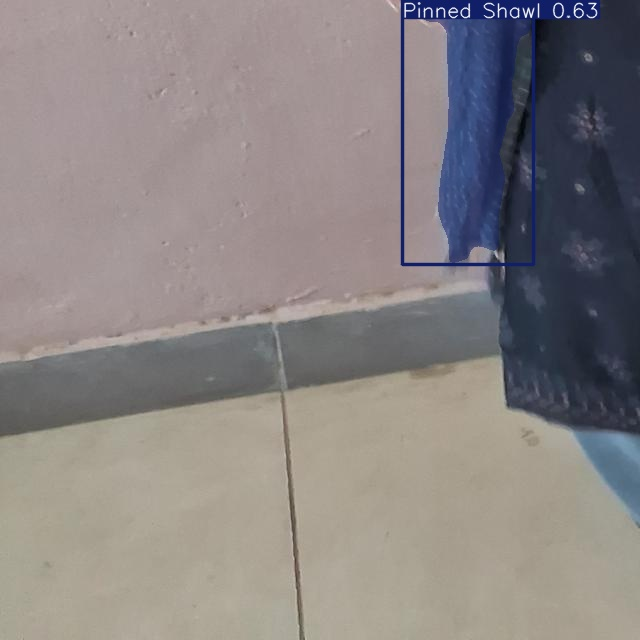

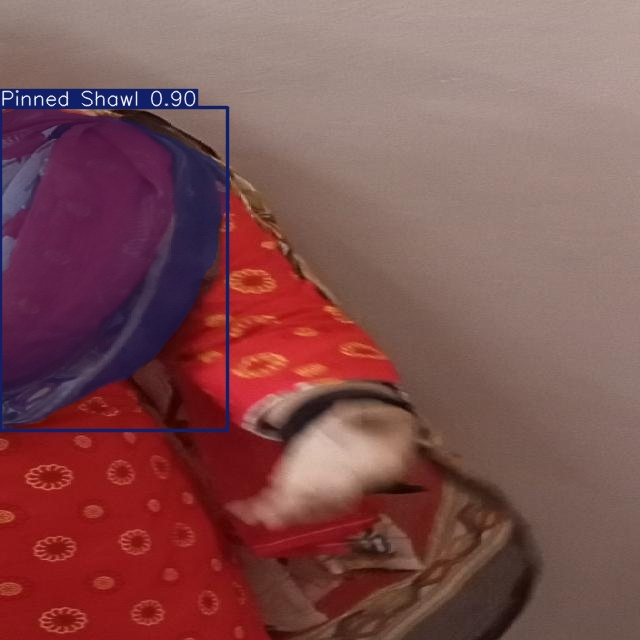

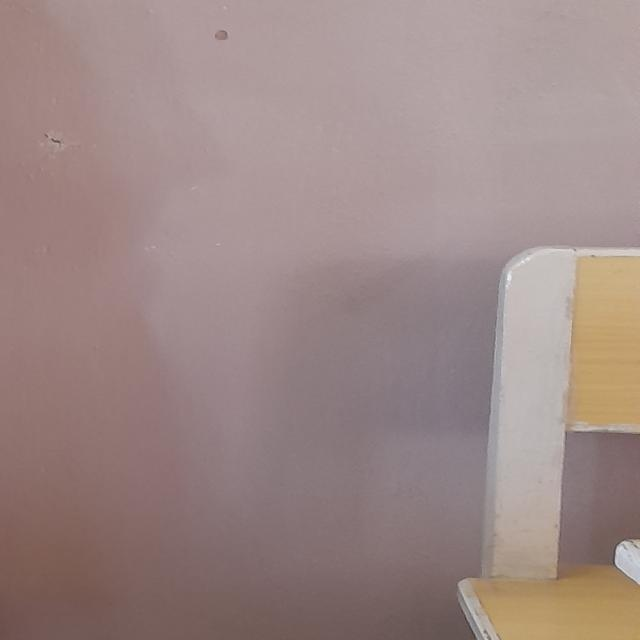

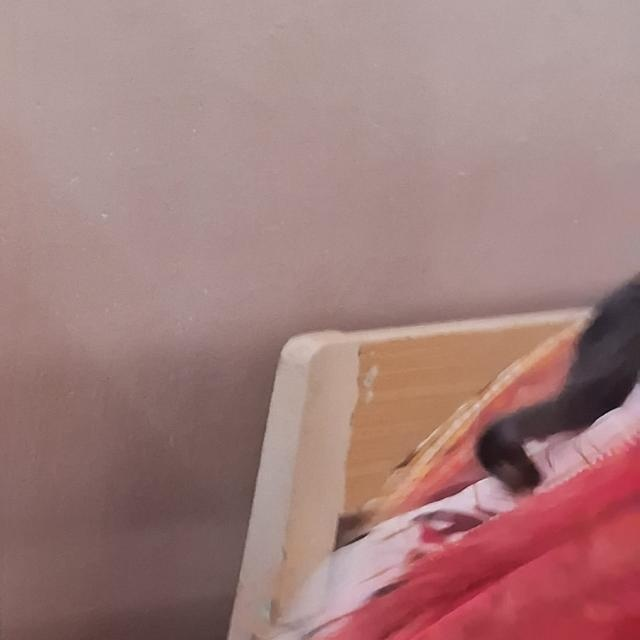

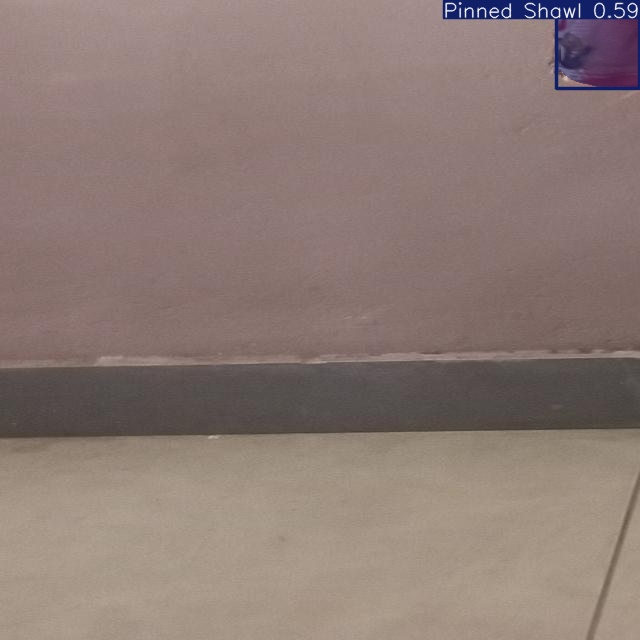

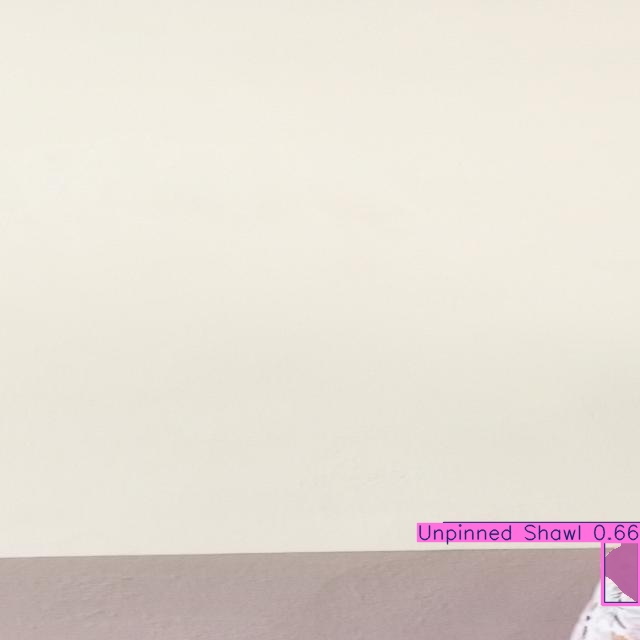

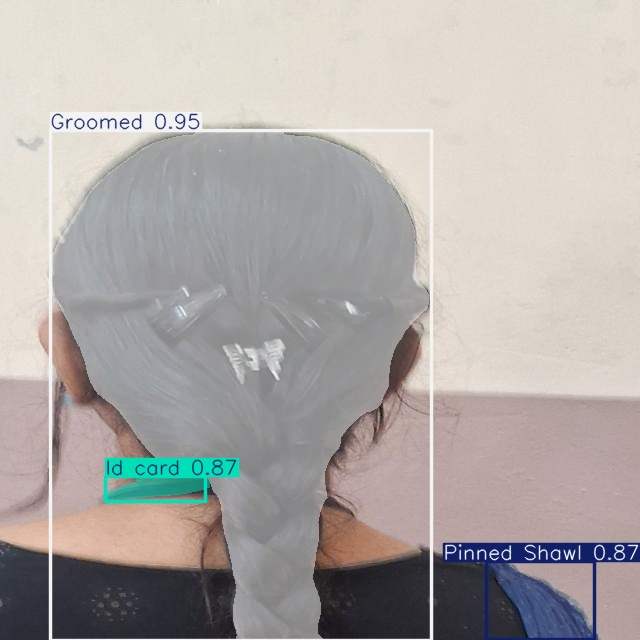

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob("/content/datasets/runs/segment/predict"),key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[5:100]:
  display(IPyImage(filename=img,width=600))
  print("\n")

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 944, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 146, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 289, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 912, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 839, in torch_safe_load
    ckpt = torch.load(fi

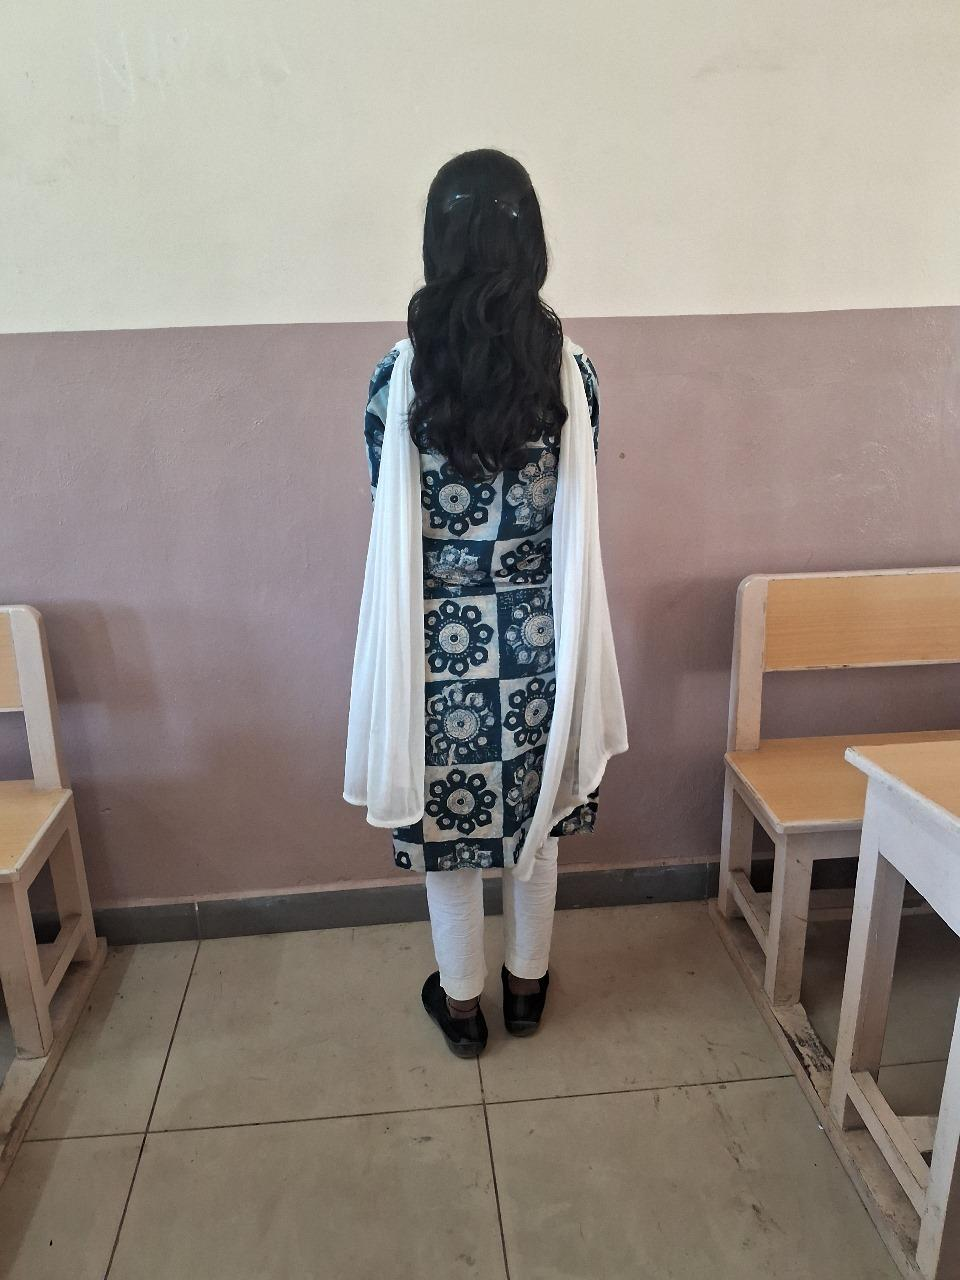

In [ ]:
# 1. Upload JFIF (using your preferred method)

# 2. Convert JFIF to JPEG
from PIL import Image
img = Image.open('/content/check8.jfif')
img.save('/content/changer8.jpeg')

# 3. Run prediction
!yolo task=segment mode=predict model="/content/runs/segment/train/weights/best.pt" conf=0.25 source="/content/changer8.jpeg'" save=true

# 4. Display output
from IPython.display import Image
Image(filename='/content/changer8.jpeg', width=600)  # Replace with the output image path


In [ ]:
!yolo task=segment mode=predict model="/content/datasets/runs/segment/train/weights/best.pt" conf=0.25 source="/content/changer8.jpeg" save=true

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,836,128 parameters, 0 gradients, 10.2 GFLOPs

image 1/1 /content/changer8.jpeg: 640x480 1 Black Shoe, 1 Groomed, 2 Pinned Shawls, 51.8ms
Speed: 2.7ms preprocess, 51.8ms inference, 578.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=segment mode=predict model="/content/datasets/runs/segment/train/weights/best.pt" conf=0.25 source="/content/bala (1).jpg" save=true

/bin/bash: line 1: yolo: command not found
